In [150]:
import os
import pandas as pd
import numpy as np
from scipy.stats import genextreme
from scipy.stats import linregress

import sys


import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
from matplotlib.pylab import rcParams

In [151]:
import os
import pandas as pd
import numpy as np
from scipy.stats import genextreme
from scipy.stats import linregress


#!pip install scipy

In [152]:
diretorio_quero2 = r'INMET/Cuiabadados_83361_D_1910-12-31_2024-06-28.csv'

ler = pd.read_csv(diretorio_quero2, skiprows = 9, sep=';', decimal=',')
display(ler)

from datetime import datetime
# Convertendo a coluna 'Data Medicao' para datetime
ler['Data Medicao'] = pd.to_datetime(ler['Data Medicao'], format="%Y-%m-%d")


ler=pd.DataFrame(ler.rename(columns ={'Data Medicao':'data', 'PRECIPITACAO TOTAL, DIARIO(mm)':'chuva diaria(mm)'}))
ler= ler[['data' ,'chuva diaria(mm)']]
ler['ano']= ler['data'].dt.year
display(ler)


#analisar os dados por completo
def is_leap_year(year):
    #print("Verifica se um ano é bissexto.")
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

def days_in_year(year):
    #print("Retorna o número de dias em um ano específico.")
    return 366 if is_leap_year(year) else 365


null_counts_res = ler.isnull().sum()
print('verificar se tem dias sem dados, neste caso não')
print(null_counts_res)

#base para filtrar os dados, e retirar o ano que não tem todos os dados diários
#deletar a linha toda que tem NaN
#axis = 0 são dados de linha, e o axis= 1 é de coluna
ler_deletado_nan=ler.dropna(axis=0, how='any')
ler_deletado_nan=ler_deletado_nan.reset_index()
display(ler_deletado_nan)

ler_deletado_nan['dias'] = ler_deletado_nan.groupby(['ano'])['ano'].transform('count')

ler_deletado_nan

ler_deletado_nan['Dias_que_deve_Ter']= [days_in_year(ano) for ano in ler_deletado_nan['ano']]


ler_deletado_nan


Max_anual_novo_deletado = pd.DataFrame(ler_deletado_nan.groupby(['ano','Dias_que_deve_Ter']).agg({'chuva diaria(mm)':'max','dias':'max'}))
Max_anual_novo_deletado= Max_anual_novo_deletado.reset_index()
display(Max_anual_novo_deletado)


ano_para_remover=[]
for n, dias in enumerate(Max_anual_novo_deletado['dias']):
    if dias != Max_anual_novo_deletado['Dias_que_deve_Ter'][n]:
            print('ano remover')
            print(Max_anual_novo_deletado['ano'][n])
            ano_para_remover.append(Max_anual_novo_deletado['ano'][n])
            
            
print('saber quais anos devo remover, pois não obedeceu a regra para a análise')
print(ano_para_remover)


              
#--------------------removendo----------------------


for n, ano_u in enumerate(Max_anual_novo_deletado['ano']):
  #  print(n, ano_u)
    for ano_deleta in ano_para_remover:
        #print(ano_deleta, ano_u)
        if ano_u == ano_deleta :
            print(ano_u,ano_deleta)
            indices_to_remove = Max_anual_novo_deletado[Max_anual_novo_deletado['ano'] == Max_anual_novo_deletado['ano'][n]].index
            print(indices_to_remove, ano_u)
            # Usando .loc para remover as linhas
            Max_anual_novo_deletado = Max_anual_novo_deletado.drop(indices_to_remove)
display(Max_anual_novo_deletado)
                

Max_anual_novo_deletado=Max_anual_novo_deletado[['ano', 'chuva diaria(mm)']]
display(Max_anual_novo_deletado)



,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)",Unnamed: 2
0,1961-01-01,NaN,NaN
1,1961-01-02,0.0,NaN
2,1961-01-03,4.1,NaN
3,1961-01-04,14.8,NaN
4,1961-01-05,1.3,NaN
...,...,...,...
23185,2024-06-24,0.0,NaN
23186,2024-06-25,0.0,NaN
23187,2024-06-26,0.0,NaN
23188,2024-06-27,0.0,NaN


,data,chuva diaria(mm),ano
0,1961-01-01,NaN,1961
1,1961-01-02,0.0,1961
2,1961-01-03,4.1,1961
3,1961-01-04,14.8,1961
4,1961-01-05,1.3,1961
...,...,...,...
23185,2024-06-24,0.0,2024
23186,2024-06-25,0.0,2024
23187,2024-06-26,0.0,2024
23188,2024-06-27,0.0,2024


verificar se tem dias sem dados, neste caso não
data                  0
chuva diaria(mm)    806
ano                   0
dtype: int64


,index,data,chuva diaria(mm),ano
0,1,1961-01-02,0.0,1961
1,2,1961-01-03,4.1,1961
2,3,1961-01-04,14.8,1961
3,4,1961-01-05,1.3,1961
4,5,1961-01-06,1.5,1961
...,...,...,...,...
22379,23185,2024-06-24,0.0,2024
22380,23186,2024-06-25,0.0,2024
22381,23187,2024-06-26,0.0,2024
22382,23188,2024-06-27,0.0,2024


,ano,Dias_que_deve_Ter,chuva diaria(mm),dias
0,1961,365,71.3,364
1,1962,365,75.8,365
2,1963,365,102.5,365
3,1964,366,107.0,365
4,1965,365,99.5,365
...,...,...,...,...
59,2020,366,53.2,353
60,2021,365,55.8,361
61,2022,365,115.2,363
62,2023,365,70.2,362


ano remover
1961
ano remover
1964
ano remover
1967
ano remover
1975
ano remover
1978
ano remover
1990
ano remover
1991
ano remover
1992
ano remover
1993
ano remover
1994
ano remover
1995
ano remover
1996
ano remover
1997
ano remover
1998
ano remover
1999
ano remover
2000
ano remover
2001
ano remover
2002
ano remover
2003
ano remover
2005
ano remover
2006
ano remover
2008
ano remover
2009
ano remover
2010
ano remover
2013
ano remover
2014
ano remover
2015
ano remover
2016
ano remover
2017
ano remover
2018
ano remover
2019
ano remover
2020
ano remover
2021
ano remover
2022
ano remover
2023
ano remover
2024
saber quais anos devo remover, pois não obedeceu a regra para a análise
[1961, 1964, 1967, 1975, 1978, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2008, 2009, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
1961 1961
Index([0], dtype='int64') 1961
1964 1964
Index([3], dtype='int64') 1964
1967 1967
Index([

,ano,Dias_que_deve_Ter,chuva diaria(mm),dias
1,1962,365,75.8,365
2,1963,365,102.5,365
4,1965,365,99.5,365
5,1966,365,124.6,365
7,1968,366,99.7,366
8,1969,365,76.5,365
9,1970,365,115.1,365
10,1971,365,68.8,365
11,1972,366,112.7,366
12,1973,365,62.5,365


,ano,chuva diaria(mm)
1,1962,75.8
2,1963,102.5
4,1965,99.5
5,1966,124.6
7,1968,99.7
8,1969,76.5
9,1970,115.1
10,1971,68.8
11,1972,112.7
12,1973,62.5


# maior chuva ao ano

# coletar dados pontuais do ERA5

# base para deletar

In [153]:
import pandas as pd

Max_anual_novo = Max_anual_novo_deletado.rename(columns={'chuva diaria(mm)': 'Pmax(mm)' })

In [154]:
tudo_plot = Max_anual_novo
display(tudo_plot)

,ano,Pmax(mm)
1,1962,75.8
2,1963,102.5
4,1965,99.5
5,1966,124.6
7,1968,99.7
8,1969,76.5
9,1970,115.1
10,1971,68.8
11,1972,112.7
12,1973,62.5


# metodo calculo IDF

In [155]:
tudo_plot=tudo_plot[['ano', 'Pmax(mm)']]

In [156]:
tudo_plot['Pmax(mm)']=tudo_plot['Pmax(mm)'].round(1)

In [157]:
tudo_plot.sort_values(by='Pmax(mm)', ascending=False)




,ano,Pmax(mm)
46,2007,142.3
5,1966,124.6
13,1974,124.1
50,2011,118.9
9,1970,115.1
11,1972,112.7
20,1981,105.8
22,1983,103.5
2,1963,102.5
18,1979,102.2


In [158]:
tudo_plot.sort_values(by='Pmax(mm)', ascending=True)

,ano,Pmax(mm)
16,1977,52.6
43,2004,58.0
12,1973,62.5
26,1987,64.0
24,1985,64.4
10,1971,68.8
19,1980,70.7
28,1989,72.0
1,1962,75.8
8,1969,76.5


In [159]:
len(tudo_plot)

28

In [160]:
Max_anual_novo = tudo_plot.set_index('ano')['Pmax(mm)']


In [161]:
Max_anual_novo.info()

<class 'pandas.core.series.Series'>
Index: 28 entries, 1962 to 2012
Series name: Pmax(mm)
Non-Null Count  Dtype  
--------------  -----  
28 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [162]:
display(Max_anual_novo)

ano
1962     75.8
1963    102.5
1965     99.5
1966    124.6
1968     99.7
1969     76.5
1970    115.1
1971     68.8
1972    112.7
1973     62.5
1974    124.1
1976     94.2
1977     52.6
1979    102.2
1980     70.7
1981    105.8
1982     78.4
1983    103.5
1984     78.6
1985     64.4
1986    100.0
1987     64.0
1988     84.6
1989     72.0
2004     58.0
2007    142.3
2011    118.9
2012     87.3
Name: Pmax(mm), dtype: float64

In [163]:
#!pip install lmoments

In [164]:
#!pip install lmoments3

In [165]:
import lmoments 
import lmoments3 as lm

In [166]:
#Max_anual_novo=Max_anual_novo[0:78]

In [167]:
#LMU = lmoments.samlmu(df)
LMU= lm.lmom_ratios(Max_anual_novo, nmom=5)
    
#This returns the first five sample L-moments, in the structured as l1, l2, t3, t4, t5. Where t3..5 = l3..5 / l2.
print('l1,l2,t3,t4,t5')
LMU

l1,l2,t3,t4,t5


[90.68928571428572,
 13.406746031746035,
 0.059946949602122025,
 0.047959836522808295,
 0.04595560918781282]

In [168]:
from scipy.stats import moment
from scipy import stats

# Ajuste a distribuição GEV
from scipy import stats
import numpy as np

# Ajuste a distribuição GEV
#correcao tirar o array
#gev_params = stats.genextreme.fit(np.ravel(Max_anual_novo))

gev_params = stats.genextreme.fit(Max_anual_novo)

#gev_params = stats.genextreme.fit(resultado_base_diario_analise)

#gev_params = stats.genextreme.fit(resultado_base_diario_analise)

# Modify the line causing the error
# Replace this line:
# obj = func(vals, data)
# With either of the following lines based on your requirement:
#obj = func(vals, data).any()
# or
#obj = func(vals, data).all()

In [169]:
print("Parâmetros da distribuição GEV:", gev_params)
gevfit =gev_params

print('''
GEV
ξ ∈ R — shape,
μ ∈ R — location,
σ > 0 — scale,

c, loc, scale
''')

Parâmetros da distribuição GEV: (0.1844097012701436, 81.65931867801194, 20.956563614734932)

GEV
ξ ∈ R — shape,
μ ∈ R — location,
σ > 0 — scale,

c, loc, scale



In [170]:
# Parâmetros ajustados
forma, loc, escala = gevfit
print(f"Parâmetros ajustados da distribuição GEV: forma(χ ou ξ)={forma}, loc(α ou μ),={loc}, escala(k ou σ)={escala}")

#A forma (ξ), a localização (μ), e a escala (σ) são impressas usando a notaçãoξ, μ, e σ.


Parâmetros ajustados da distribuição GEV: forma(χ ou ξ)=0.1844097012701436, loc(α ou μ),=81.65931867801194, escala(k ou σ)=20.956563614734932


# Fit GEV distribution

In [171]:
from scipy.stats import moment
from scipy import stats

# Ajuste a distribuição GEV
#gev_params = stats.genextreme.fit(Max_anual_novo)
gev_params = stats.genextreme.fit(Max_anual_novo)

#gev_params = stats.genextreme.fit(np.ravel(Max_anual_novo))

print("Parâmetros da distribuição GEV:", gev_params)
gevfit =gev_params

print('''
GEV
ξ ∈ R — shape,
μ ∈ R — location,
σ > 0 — scale,

c, loc, scale
''')
    

Parâmetros da distribuição GEV: (0.1844097012701436, 81.65931867801194, 20.956563614734932)

GEV
ξ ∈ R — shape,
μ ∈ R — location,
σ > 0 — scale,

c, loc, scale



In [172]:
# Crie um array de valores de T (tempo de retorno) para os quais você deseja calcular quantis
#T = np.arange(0.1, 999.1, 0.1) + 1
T = np.arange(0.1, 9999.1, 0.1) + 1

# Calcule os quantis para a distribuição GEV
gev_quantiles = stats.genextreme.ppf(1.0 - 1.0 / T, *gev_params)
gevST  =gev_quantiles

In [173]:
display(gev_quantiles)

array([ 61.77008468,  68.75607035,  73.34794427, ..., 174.50832062,
       174.50835897, 174.50839732])

# nome da cidade 

In [174]:


nomecidade=f'Cuiabá-MT'

In [175]:
#plt.plot(avi,gevqua)
plt.plot(T,gev_quantiles)

plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("GEV Distribution {}".format(nomecidade))

Text(0.5, 1.0, 'GEV Distribution Cuiabá-MT')

In [176]:
plt.plot(T,gev_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("GEV Distribution {}".format(nomecidade))

Text(0.5, 1.0, 'GEV Distribution Cuiabá-MT')

In [177]:

# Salve os dados em um DataFrame do Pandas
data = {'T': T, 'gev_quantiles': gev_quantiles}
df = pd.DataFrame(data)

In [178]:
df

,T,gev_quantiles
0,1.1,61.770085
1,1.2,68.756070
2,1.3,73.347944
3,1.4,76.837224
4,1.5,79.671209
...,...,...
99985,9999.6,174.508244
99986,9999.7,174.508282
99987,9999.8,174.508321
99988,9999.9,174.508359


In [179]:
df.sort_values(by='gev_quantiles', ascending=False)

,T,gev_quantiles
99989,10000.0,174.508397
99988,9999.9,174.508359
99987,9999.8,174.508321
99986,9999.7,174.508282
99985,9999.6,174.508244
...,...,...
4,1.5,79.671209
3,1.4,76.837224
2,1.3,73.347944
1,1.2,68.756070


In [180]:
datagev0_df_1= df.sort_values(by='gev_quantiles', ascending=False)
datagev0_df_1= datagev0_df_1.reset_index()
display(datagev0_df_1)

,index,T,gev_quantiles
0,99989,10000.0,174.508397
1,99988,9999.9,174.508359
2,99987,9999.8,174.508321
3,99986,9999.7,174.508282
4,99985,9999.6,174.508244
...,...,...,...
99985,4,1.5,79.671209
99986,3,1.4,76.837224
99987,2,1.3,73.347944
99988,1,1.2,68.756070


In [181]:
display(datagev0_df_1.loc[datagev0_df_1['T']== 2.0]) 
display(datagev0_df_1.loc[datagev0_df_1['T']== 5.0])
display(datagev0_df_1.loc[datagev0_df_1['T']== 10.0])
display(datagev0_df_1.loc[datagev0_df_1['T']== 25.0])
display(datagev0_df_1.loc[datagev0_df_1['T']== 50.0])
display(datagev0_df_1.loc[datagev0_df_1['T']== 100.0])
display(datagev0_df_1.loc[datagev0_df_1['T']== 500.0])
display(datagev0_df_1.loc[datagev0_df_1['T']== 1000.0])
display(datagev0_df_1.loc[datagev0_df_1['T']== 1000.0])

,index,T,gev_quantiles
99980,9,2.0,89.086352


,index,T,gev_quantiles
99950,39,5.0,109.120162


,index,T,gev_quantiles
99900,89,10.0,120.257918


,index,T,gev_quantiles


,index,T,gev_quantiles


,index,T,gev_quantiles
99000,989,100.0,146.646595


,index,T,gev_quantiles


,index,T,gev_quantiles


,index,T,gev_quantiles


In [182]:
Dados_estatisticos = []
Ano = int(datagev0_df_1['T'][0])
Valor = datagev0_df_1['gev_quantiles'][0]

registro=['GEV', Ano, Valor]
Dados_estatisticos.append(registro)

# Exponencial Distribuição 

In [183]:

# Suponha que você tenha seus L-moments armazenados em LMU

# Ajuste a distribuição exponencial
exp_params = stats.expon.fit(Max_anual_novo)
print("Parâmetros da distribuição exponencial:", exp_params)
expfit =exp_params
    
print('loc, scale')
print('lambda (loc)')
print('lambda >0, rate, or inverse scale')

Parâmetros da distribuição exponencial: (52.6, 38.089285714285715)
loc, scale
lambda (loc)
lambda >0, rate, or inverse scale


In [184]:
# https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_exponencial

# https://en.wikipedia.org/wiki/Exponential_distribution
# Crie um array de valores de T (tempo de retorno) para os quais você deseja calcular quantis
#T = np.arange(0.1, 999.1, 0.1) + 1

#T = np.arange(0.1, 9999.1, 0.1) + 1

 # Calcule os quantis para a distribuição exponencial
exp_quantiles = stats.expon.ppf(1.0 - 1.0 / T, *exp_params)
expST  =exp_quantiles

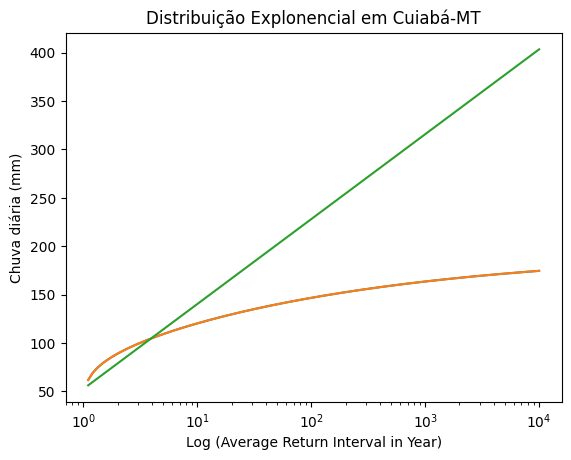

In [185]:
#plt.plot(avi,gevqua)

plt.plot(T,exp_quantiles)
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição Explonencial em {}".format(nomecidade))

plt.show()

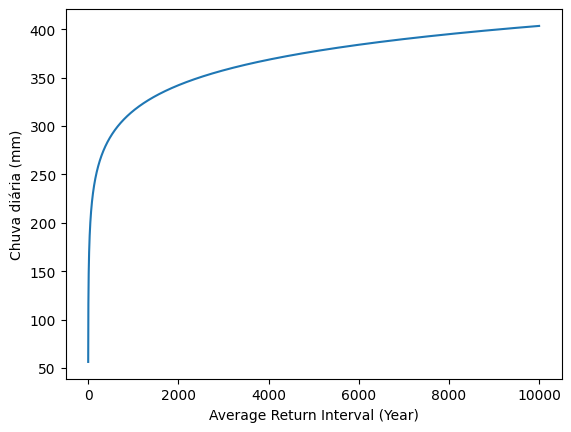

In [186]:
plt.plot(T,exp_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.show()

In [187]:

# Salve os dados em um DataFrame do Pandas
dataexpo = {'T': T, 'exp_quantiles': exp_quantiles}
dataexpo_df = pd.DataFrame(dataexpo)

In [188]:
dataexpo_df.sort_values(by='exp_quantiles', ascending=False)

,T,exp_quantiles
99989,10000.0,403.415286
99988,9999.9,403.414905
99987,9999.8,403.414524
99986,9999.7,403.414143
99985,9999.6,403.413762
...,...,...
4,1.5,68.043876
3,1.4,65.415987
2,1.3,62.593267
1,1.2,59.544498


In [189]:
dataexpo_df_1= dataexpo_df.sort_values(by='exp_quantiles', ascending=False)
dataexpo_df_1= dataexpo_df_1.reset_index()
display(dataexpo_df_1)

,index,T,exp_quantiles
0,99989,10000.0,403.415286
1,99988,9999.9,403.414905
2,99987,9999.8,403.414524
3,99986,9999.7,403.414143
4,99985,9999.6,403.413762
...,...,...,...
99985,4,1.5,68.043876
99986,3,1.4,65.415987
99987,2,1.3,62.593267
99988,1,1.2,59.544498


In [190]:
Ano = int(dataexpo_df_1['T'][0])
Valor = dataexpo_df_1['exp_quantiles'][0]

registro=['EXP- Exponencial', Ano, Valor]
Dados_estatisticos.append(registro)

# Distribuição Gumbel

In [191]:
    
# Ajuste a distribuição Gumbel
gum_params = stats.gumbel_r.fit(Max_anual_novo)
print("Parâmetros da distribuição Gumbel:", gum_params)  
gumfit =gum_params
print('loc, scale')
print('')
print('μ  β')

Parâmetros da distribuição Gumbel: (79.65790087721237, 19.65471190520582)
loc, scale

μ  β


https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_de_Gumbel


In [192]:
# Calcule os quantis para a distribuição Gumbel
gum_quantiles = stats.gumbel_r.ppf(1.0 - 1.0 / T, *gum_params)
gumST  =gum_quantiles

In [193]:
display(gum_quantiles)

array([ 62.46805921,  68.19531062,  72.13471591, ..., 260.68311154,
       260.6833081 , 260.68350466])

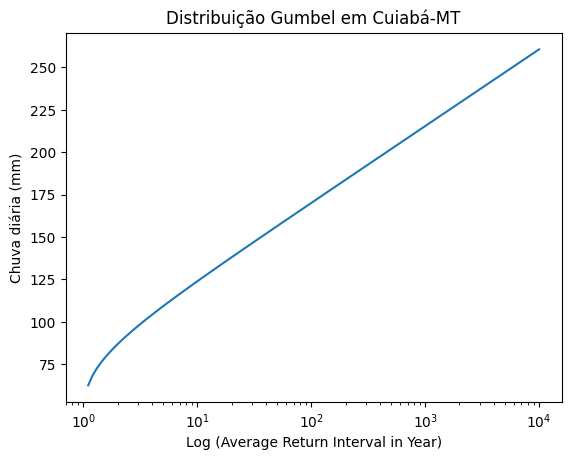

In [194]:
#plt.plot(avi,gevqua)
plt.plot(T,gum_quantiles)
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição Gumbel em {}".format(nomecidade))
plt.show()

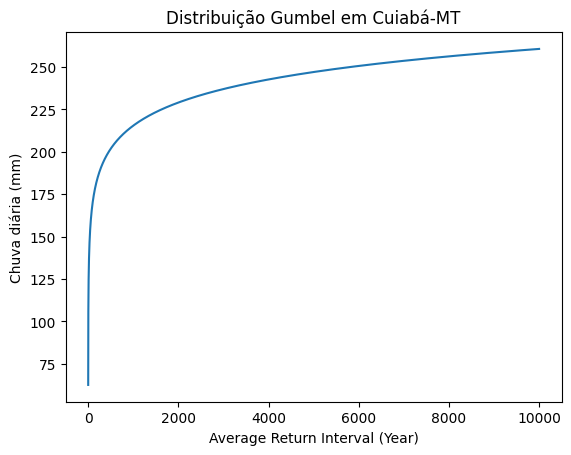

In [195]:
plt.plot(T,gum_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição Gumbel em {}".format(nomecidade))
plt.show()

In [196]:
# Salve os dados em um DataFrame do Pandas
datagumbel= {'T': T, 'gum_quantiles': gum_quantiles}
datagumbel_df = pd.DataFrame(datagumbel)

datagumbel_df_1= datagumbel_df.sort_values(by='gum_quantiles', ascending=False)
datagumbel_df_1= datagumbel_df_1.reset_index()
display(datagumbel_df_1)

,index,T,gum_quantiles
0,99989,10000.0,260.683505
1,99988,9999.9,260.683308
2,99987,9999.8,260.683112
3,99986,9999.7,260.682915
4,99985,9999.6,260.682718
...,...,...,...
99985,4,1.5,77.809418
99986,3,1.4,75.228682
99987,2,1.3,72.134716
99988,1,1.2,68.195311


In [197]:
Ano = int(datagumbel_df_1['T'][0])
Valor = datagumbel_df_1['gum_quantiles'][0]

registro=['GUM - Gummbel', Ano, Valor]
Dados_estatisticos.append(registro)

# distribuição Weibull

In [198]:
# Ajuste a distribuição Weibull
#weibull_params = stats.weibull_min.fit(Max_anual_novo)
#weibull_params = stats.weibull_min.fit(np.ravel(Max_anual_novo))
weibull_params = stats.weibull_min.fit(Max_anual_novo)

print("Parâmetros da distribuição Weibull:", weibull_params)
weifit =weibull_params

Parâmetros da distribuição Weibull: (1.967885414999981, 47.697979255876675, 48.462225721986016)


In [199]:
# Agora você tem os quantis para diferentes distribuições em arrays gev_quantiles, exp_quantiles e gum_quantiles
# Calcule os quantis para a distribuição Weibull (Wei)
wei_quantiles = stats.weibull_min.ppf(1.0 - 1.0 / T, *weifit)
weiST  =wei_quantiles


In [200]:
display(wei_quantiles)

array([ 62.37517599,  68.10553773,  72.25152131, ..., 197.46248125,
       197.46256388, 197.46264651])

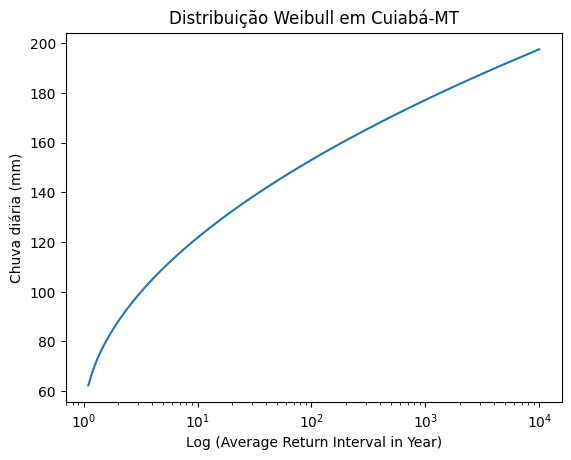

In [201]:
#plt.plot(avi,gevqua)
plt.plot(T,wei_quantiles)
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição Weibull em {}".format(nomecidade))
plt.show()

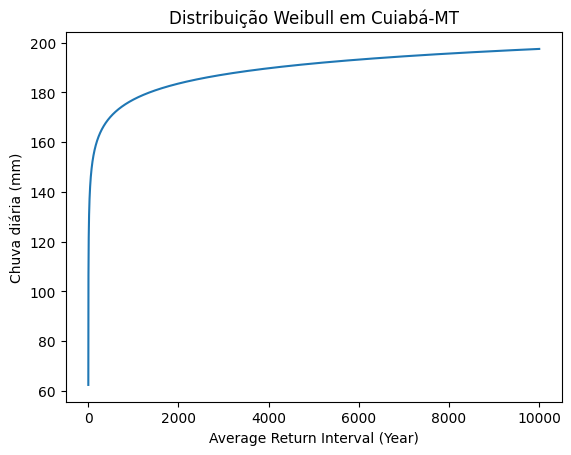

In [202]:
plt.plot(T,wei_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição Weibull em {}".format(nomecidade))
plt.show()

In [203]:
# Salve os dados em um DataFrame do Pandas
dataWeibulll= {'T': T, 'wei_quantiles': wei_quantiles}
dataWeibulll_df = pd.DataFrame(dataWeibulll)

dataWeibulll_df_1= dataWeibulll_df.sort_values(by='wei_quantiles', ascending=False)
dataWeibulll_df_1= dataWeibulll_df_1.reset_index()
display(dataWeibulll_df_1)

,index,T,wei_quantiles
0,99989,10000.0,197.462647
1,99988,9999.9,197.462564
2,99987,9999.8,197.462481
3,99986,9999.7,197.462399
4,99985,9999.6,197.462316
...,...,...,...
99985,4,1.5,78.330387
99986,3,1.4,75.560348
99987,2,1.3,72.251521
99988,1,1.2,68.105538


In [204]:

Ano = int(dataWeibulll_df_1['T'][0])
Valor = dataWeibulll_df_1['wei_quantiles'][0]

registro=['WEI - Weibull ', Ano, Valor]
Dados_estatisticos.append(registro)

# distribuição Gamma

In [205]:
# Ajuste a distribuição Gama (Gamma)
#gamma_params = stats.gamma.fit(Max_anual_novo)
#gamma_params = stats.gamma.fit(np.ravel(Max_anual_novo))

gamma_params = stats.gamma.fit(Max_anual_novo)
print("Parâmetros da distribuição Gama:", gamma_params)
gpafit=gamma_params
    
print('a, loc, scale (The location parameter is not calculated using Lmoments and assumed to be zero.)')
print()
print('Com um parâmetro de forma k e um parâmetro de escala θ theta.')
print('x, k e tetha (θ)')

Parâmetros da distribuição Gama: (5.615649469481886, 34.55121583601537, 9.996719202214333)
a, loc, scale (The location parameter is not calculated using Lmoments and assumed to be zero.)

Com um parâmetro de forma k e um parâmetro de escala θ theta.
x, k e tetha (θ)


https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_gama

In [206]:
# Calcule os quantis para a distribuição Gama (GPA)
gpa_quantiles = stats.gamma.ppf(1.0 - 1.0 / T, *gpafit)
gpaST  =gpa_quantiles

In [207]:
display(gpa_quantiles)

array([ 62.46682929,  68.26380526,  72.3078968 , ..., 223.38284918,
       223.38297896, 223.38310874])

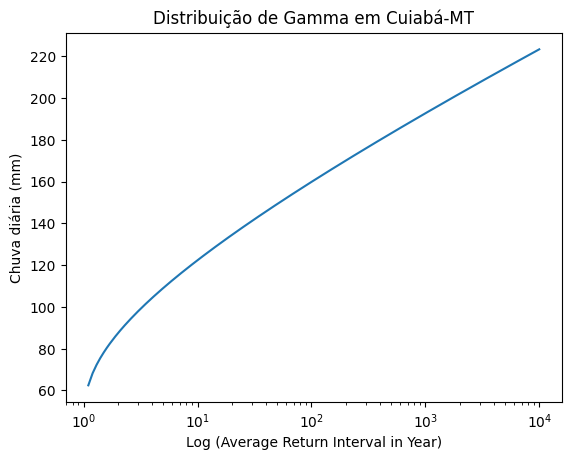

In [208]:
#plt.plot(avi,gevqua)
plt.plot(T,gpa_quantiles)
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição de Gamma em {}".format(nomecidade))
plt.show()

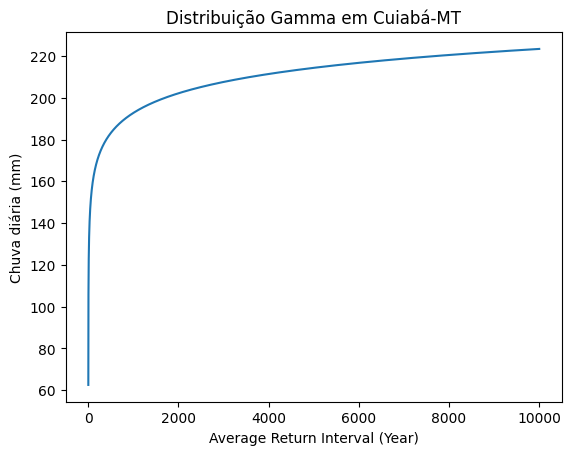

In [209]:
plt.plot(T,gpa_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição Gamma em {}".format(nomecidade))
plt.show()

In [210]:
# Salve os dados em um DataFrame do Pandas
dataGamma= {'T': T, 'gpa_quantiles': gpa_quantiles}
dataGamma_df = pd.DataFrame(dataGamma)

dataGamma_df_1= dataGamma_df.sort_values(by='gpa_quantiles', ascending=False)
dataGamma_df_1= dataGamma_df_1.reset_index()
display(dataGamma_df_1)

,index,T,gpa_quantiles
0,99989,10000.0,223.383109
1,99988,9999.9,223.382979
2,99987,9999.8,223.382849
3,99986,9999.7,223.382719
4,99985,9999.6,223.382590
...,...,...,...
99985,4,1.5,78.152603
99986,3,1.4,75.495191
99987,2,1.3,72.307897
99988,1,1.2,68.263805


In [211]:

Ano = int(dataGamma_df_1['T'][0])
Valor = dataGamma_df_1['gpa_quantiles'][0]

registro=['GPA - Gamma ', Ano, Valor]
Dados_estatisticos.append(registro)

# distribuição Pareto de 3 parâmetros (PE3)

In [212]:
# Ajuste a distribuição Pareto de 3 parâmetros
#pareto3_params = stats.genpareto.fit(Modeloano)
#pareto3_params = stats.genpareto.fit(np.ravel(Max_anual_novo))
pareto3_params = stats.genpareto.fit(Max_anual_novo)

print("Parâmetros da distribuição Pareto de 3 parâmetros:", pareto3_params)
pe3fit =pareto3_params

print('c, loc, scale')

print('L>0, location, H>L location, alfha  α shape ')

Parâmetros da distribuição Pareto de 3 parâmetros: (-1.4054083138266367, -0.8791044496961087, 201.22510375985536)
c, loc, scale
L>0, location, H>L location, alfha  α shape 


https://en.wikipedia.org/wiki/Pareto_distribution


In [213]:

# Calcule os quantis para a distribuição Pareto de 3 parâmetros (PE3)
pe3_quantiles = stats.genpareto.ppf(1.0 - 1.0 / T, *pe3fit)
pe3ST  =pe3_quantiles

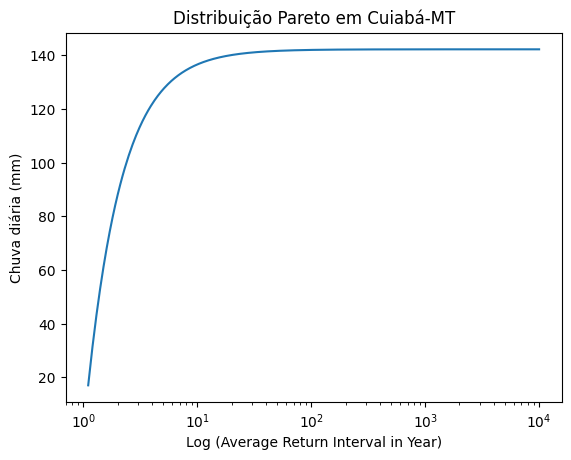

In [214]:
#plt.plot(avi,gevqua)
plt.plot(T,pe3_quantiles)
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição Pareto em {}".format(nomecidade))
plt.show()

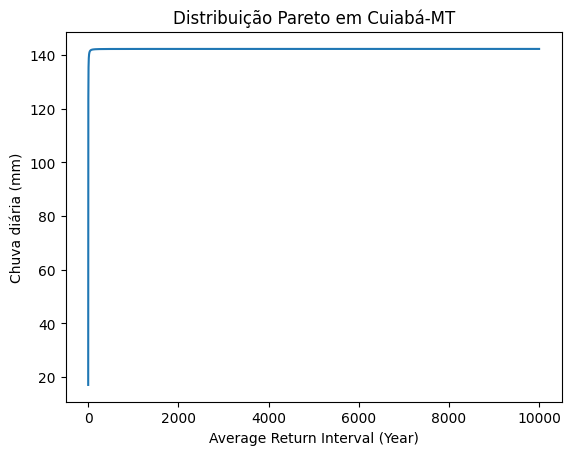

In [215]:
plt.plot(T,pe3_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição Pareto em {}".format(nomecidade))
plt.show()

In [216]:
# Salve os dados em um DataFrame do Pandas
dataPareto= {'T': T, 'pe3_quantiles': pe3_quantiles}
dataPareto_df = pd.DataFrame(dataPareto)

dataPareto_df_1= dataPareto_df.sort_values(by='pe3_quantiles', ascending=False)
dataPareto_df_1= dataPareto_df_1.reset_index()
display(dataPareto_df_1)

,index,T,pe3_quantiles
0,99989,10000.0,142.299658
1,99988,9999.9,142.299658
2,99987,9999.8,142.299658
3,99986,9999.7,142.299658
4,99985,9999.6,142.299658
...,...,...,...
99985,4,1.5,61.315944
99986,3,1.4,53.070166
99987,2,1.3,43.275489
99988,1,1.2,31.485227


In [217]:
Ano = int(dataPareto_df_1['T'][0])
Valor = dataPareto_df_1['pe3_quantiles'][0]

registro=['PE3 - Pareto ', Ano, Valor]
Dados_estatisticos.append(registro)

#  Gama generalizada (Generalized Gamma)

In [218]:
# Ajuste a distribuição Gama generalizada (Generalized Gamma)
#gengamma_params = stats.gengamma.fit(Max_anual_novo)
#colocaar só quando tiver dados em np nump ou array
#gengamma_params = stats.gengamma.fit(np.ravel(Max_anual_novo))

gengamma_params = stats.gengamma.fit(Max_anual_novo)

print("Parâmetros da distribuição Gama generalizada:", gengamma_params)
gamfit =gengamma_params
print('loc, scale')
print('k, alpha, beta')

Parâmetros da distribuição Gama generalizada: (1.2695749505675142, 0.2216959721220856, 52.599999999999994, 1.3429138653463442)
loc, scale
k, alpha, beta


In [219]:
 # Calcule os quantis para a distribuição Gama generalizada (GAM)
gam_quantiles = stats.gengamma.ppf(1.0 - 1.0 / T, *gamfit)
gamST  =gam_quantiles

In [220]:
display(gam_quantiles)

array([   52.60062175,    52.6068501 ,    52.62676885, ...,
       42747.22844608, 42747.42675971, 42747.62507206])

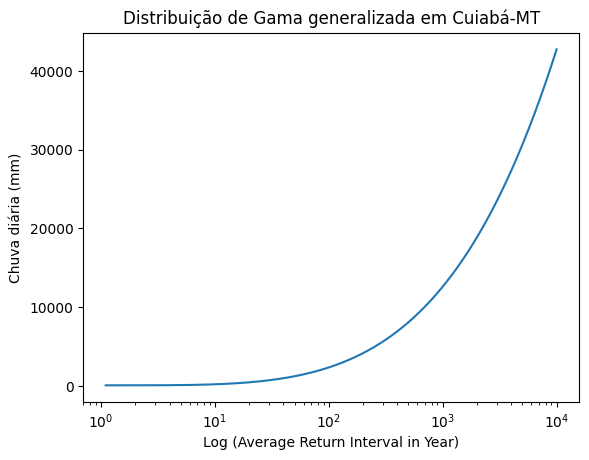

In [221]:
#plt.plot(avi,gevqua)
plt.plot(T,gam_quantiles)
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição de Gama generalizada em {}".format(nomecidade))
plt.show()

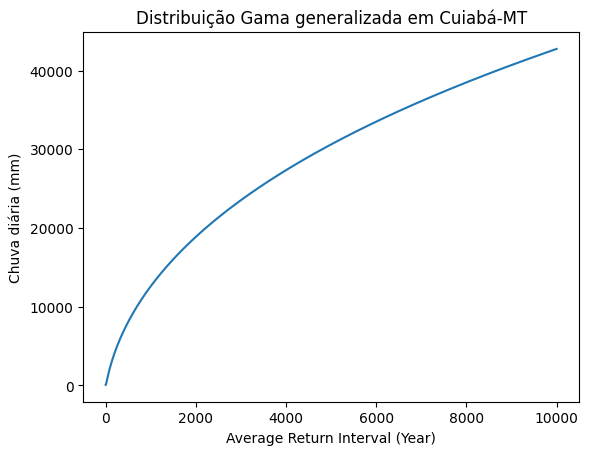

In [222]:
plt.plot(T,gam_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição Gama generalizada em {}".format(nomecidade))
plt.show()

In [223]:
# Salve os dados em um DataFrame do Pandas
dataGAmmaGeneral= {'T': T, 'gam_quantiles': gam_quantiles}
dataGAmmaGeneral_df = pd.DataFrame(dataGAmmaGeneral)

dataGAmmaGeneral_df_1= dataGAmmaGeneral_df.sort_values(by='gam_quantiles', ascending=False)
dataGAmmaGeneral_df_1= dataGAmmaGeneral_df_1.reset_index()
display(dataGAmmaGeneral_df_1)

,index,T,gam_quantiles
0,99989,10000.0,42747.625072
1,99988,9999.9,42747.426760
2,99987,9999.8,42747.228446
3,99986,9999.7,42747.030131
4,99985,9999.6,42746.831815
...,...,...,...
99985,4,1.5,52.739247
99986,3,1.4,52.668510
99987,2,1.3,52.626769
99988,1,1.2,52.606850


In [224]:
Ano = int(dataGAmmaGeneral_df_1['T'][0])
Valor = dataGAmmaGeneral_df_1['gam_quantiles'][0]

registro=['GAM - Gamma Generalizada ', Ano, Valor]
Dados_estatisticos.append(registro)

# Log Normal

In [225]:
# Ajuste a distribuição Log-normal
#lognormal_params = stats.lognorm.fit(Modeloano)

lognormal_params = stats.lognorm.fit(Max_anual_novo)

#lognormal_params = stats.lognorm.fit(np.ravel(Max_anual_novo))
print("Parâmetros da distribuição Log-normal:", lognormal_params)
glofit =lognormal_params
print('k, loc, scale')
print('''
distribuição log-normal para µ=0 e diferentes valores de σ.
X, µ,σ
''')

Parâmetros da distribuição Log-normal: (0.20953533440912103, -18.59131199682562, 106.92687493856678)
k, loc, scale

distribuição log-normal para µ=0 e diferentes valores de σ.
X, µ,σ



In [226]:
# Calcule os quantis para a distribuição Log-normal (GLO)
glo_quantiles = stats.lognorm.ppf(1.0 - 1.0 / T, *glofit)
gloST  =glo_quantiles

In [227]:
display(glo_quantiles)

array([ 62.24112036,  68.7161721 ,  73.04805839, ..., 214.49515631,
       214.49527969, 214.49540307])

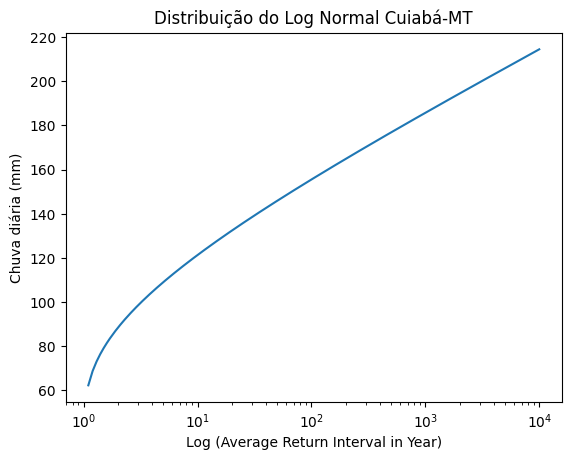

In [228]:
#plt.plot(avi,gevqua)
plt.plot(T,glo_quantiles)
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição do Log Normal {}".format(nomecidade))
plt.show()

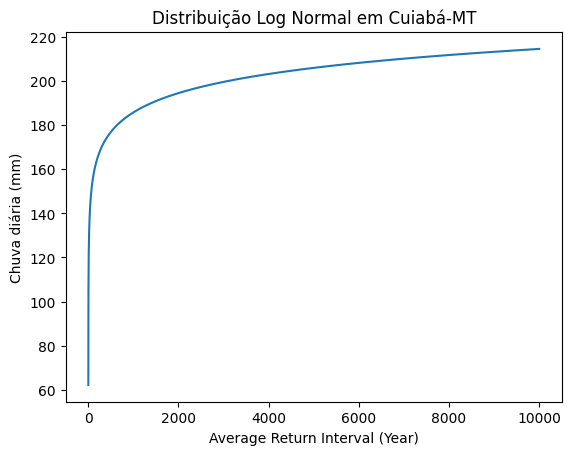

In [229]:
plt.plot(T,glo_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição Log Normal em {}".format(nomecidade))
plt.show()

In [230]:
# Salve os dados em um DataFrame do Pandas
dataGLO= {'T': T, 'glo_quantiles': glo_quantiles}
dataGLO_df = pd.DataFrame(dataGLO)

dataGLO_df_1= dataGLO_df .sort_values(by='glo_quantiles', ascending=False)
dataGLO_df_1= dataGLO_df_1.reset_index()
display(dataGLO_df_1)

,index,T,glo_quantiles
0,99989,10000.0,214.495403
1,99988,9999.9,214.495280
2,99987,9999.8,214.495156
3,99986,9999.7,214.495033
4,99985,9999.6,214.494910
...,...,...,...
99985,4,1.5,79.107813
99986,3,1.4,76.378485
99987,2,1.3,73.048058
99988,1,1.2,68.716172


In [231]:
Ano = int(dataGLO_df_1['T'][0])
Valor = dataGLO_df_1['glo_quantiles'][0]

registro=['LN - LOG NORMAL ', Ano, Valor]
Dados_estatisticos.append(registro)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genlogistic.html



Fit genlogistic GLO (oficial) distribution


Parâmetros da distribuição genlogistic GLO (oficial) : (242.27900178191703, -27.92510501881216, 19.60525794121198)

x, c, loc=0, scale=1
loc1, scale1




array([ 62.46583609,  68.20323658,  72.14591117, ..., 260.27924705,
       260.27944311, 260.27963918])

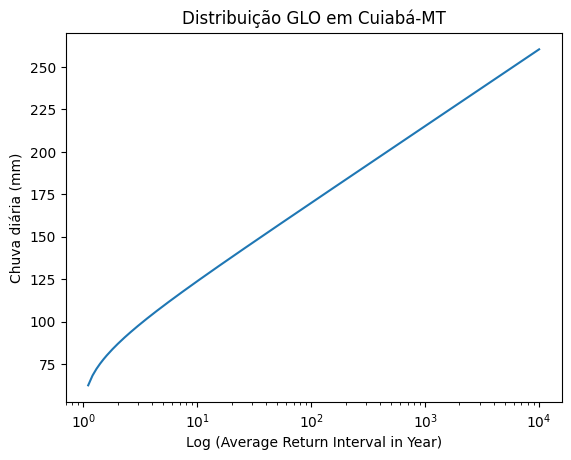

,index,T,glo_of_quantiles
0,99989,10000.0,260.279639
1,99988,9999.9,260.279443
2,99987,9999.8,260.279247
3,99986,9999.7,260.279051
4,99985,9999.6,260.278855
...,...,...,...
99985,4,1.5,77.821226
99986,3,1.4,75.240742
99987,2,1.3,72.145911
99988,1,1.2,68.203237


In [232]:

#x, c, loc=0, scale=1
#loc1, scale1
#(0.92087172783841631, 2.0015750750324668)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html#scipy.stats.rv_continuous.fit
from scipy.stats import moment
from scipy import stats

# Ajuste a distribuição GEV
glo_params_of = stats.genlogistic.fit(Max_anual_novo)


print("Parâmetros da distribuição genlogistic GLO (oficial) :", glo_params_of)
glo_of_fit =glo_params_of 

print('''
x, c, loc=0, scale=1
loc1, scale1

''')
#-------------------------------------------------------------------------------    
# Crie um array de valores de T (tempo de retorno) para os quais você deseja calcular quantis
#T = np.arange(0.1, 999.1, 0.1) + 1
T = np.arange(0.1, 9999.1, 0.1) + 1


# Calcule os quantis para a distribuição GEV
glo_of_quantiles = stats.genlogistic.ppf(1.0 - 1.0 / T, *glo_params_of)
glo_ofST  =glo_of_quantiles

display(glo_of_quantiles)

#-----------------------------------------


plt.plot(T,glo_of_quantiles)
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição GLO em {}".format(nomecidade))


plt.show()
#-----------------------------------------------------------
plt.plot(T,glo_of_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição GLO em {}".format(nomecidade))

#----------------------------------------------
# Salve os dados em um DataFrame do Pandas
dataglo_of= {'T': T, 'glo_of_quantiles': glo_of_quantiles}
dataglo_of_df = pd.DataFrame(dataglo_of)

dataglo_of_df_1= dataglo_of_df.sort_values(by='glo_of_quantiles', ascending=False)
dataglo_of_df_1= dataglo_of_df_1.reset_index()
display(dataglo_of_df_1)


Ano = int(dataglo_of_df_1['T'][0])
Valor = dataglo_of_df_1['glo_of_quantiles'][0]

registro=['GLO - Generalized Logistic', Ano, Valor]
Dados_estatisticos.append(registro)




In [233]:
Dados_estatisticos

[['GEV', 10000, 174.50839731528015],
 ['EXP- Exponencial', 10000, 403.41528595402565],
 ['GUM - Gummbel', 10000, 260.6835046607476],
 ['WEI - Weibull ', 10000, 197.4626465084262],
 ['GPA - Gamma ', 10000, 223.3831087356496],
 ['PE3 - Pareto ', 10000, 142.29965782648878],
 ['GAM - Gamma Generalizada ', 10000, 42747.625072055744],
 ['LN - LOG NORMAL ', 10000, 214.49540306912544],
 ['GLO - Generalized Logistic', 10000, 260.2796391757182]]

In [234]:
Dados_estatisticos_df=  pd.DataFrame(Dados_estatisticos, columns= ['Tipo', 'T' , 'Maior chuva'])


In [235]:
Dados_estatisticos_df.round(1)

,Tipo,T,Maior chuva
0,GEV,10000,174.5
1,EXP- Exponencial,10000,403.4
2,GUM - Gummbel,10000,260.7
3,WEI - Weibull,10000,197.5
4,GPA - Gamma,10000,223.4
5,PE3 - Pareto,10000,142.3
6,GAM - Gamma Generalizada,10000,42747.6
7,LN - LOG NORMAL,10000,214.5
8,GLO - Generalized Logistic,10000,260.3


# teste kappa

In [236]:
from scipy import stats

#https://docs.scipy.org/doc/scipy/tutorial/stats.html

In [237]:
kap_params3 = stats.kappa3.fit(Max_anual_novo)
print("Parâmetros da distribuição Kappa3:", kap_params3)

#alpha, k, h  
print(f"Parâmetros ajustados da distribuição Kappa-3: alpha={kap_params3[0]}, k={kap_params3[1]}, h={kap_params3[2]}")

print('kappa3.pdf(x, a, loc, scale) \nis identically equivalent to kappa3.pdf(y, a) / scale with y = (x - loc) / scale')
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kappa3.html

Parâmetros da distribuição Kappa3: (67.8031743579968, 52.59999999919731, 84.7115339294109)
Parâmetros ajustados da distribuição Kappa-3: alpha=67.8031743579968, k=52.59999999919731, h=84.7115339294109
kappa3.pdf(x, a, loc, scale) 
is identically equivalent to kappa3.pdf(y, a) / scale with y = (x - loc) / scale


In [238]:
kap_params4 = stats.kappa4.fit(Max_anual_novo)
print("Parâmetros da distribuição Kappa4:", kap_params4)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kappa4.html
print('x, h, k')

print(f"Parâmetros ajustados da distribuição Kappa-4: xi={kap_params4[0]}, alpha={kap_params4[1]}, k={kap_params4[2]}, h={kap_params4[3]}")

Parâmetros da distribuição Kappa4: (1.1254999772603536, 0.9781831714294315, 41.53782185740883, 99.08166753694555)
x, h, k
Parâmetros ajustados da distribuição Kappa-4: xi=1.1254999772603536, alpha=0.9781831714294315, k=41.53782185740883, h=99.08166753694555


In [239]:
# Calcule os quantis para a distribuição kappa3
kappa3_quantiles = stats.kappa3.ppf(1.0 - 1.0 / T, *kap_params3)


In [240]:
# Calcule os quantis para a distribuição kappa4
kappa4_quantiles = stats.kappa4.ppf(1.0 - 1.0 / T, *kap_params4)

In [241]:
display(kappa3_quantiles)
display(kappa4_quantiles)

array([ 60.79517409,  67.62448583,  73.40313422, ..., 149.63192716,
       149.63194152, 149.63195588])

array([ 58.54301418,  64.36574823,  69.58240424, ..., 142.8169657 ,
       142.81696582, 142.81696594])

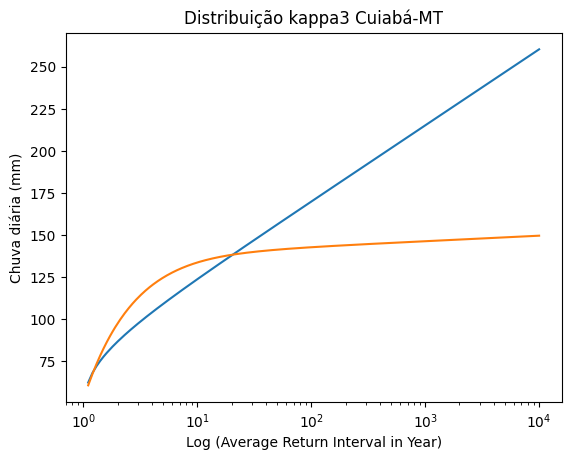

In [242]:
#plt.plot(avi,gevqua)
plt.plot(T,kappa3_quantiles)

plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição kappa3 {}".format(nomecidade))
plt.show()

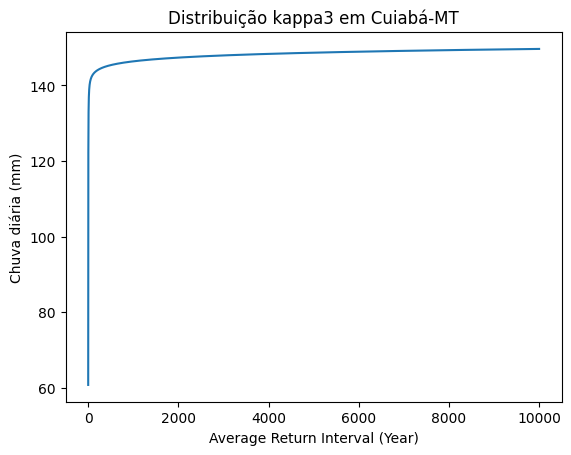

In [243]:
plt.plot(T,kappa3_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição kappa3 em {}".format(nomecidade))
plt.show()

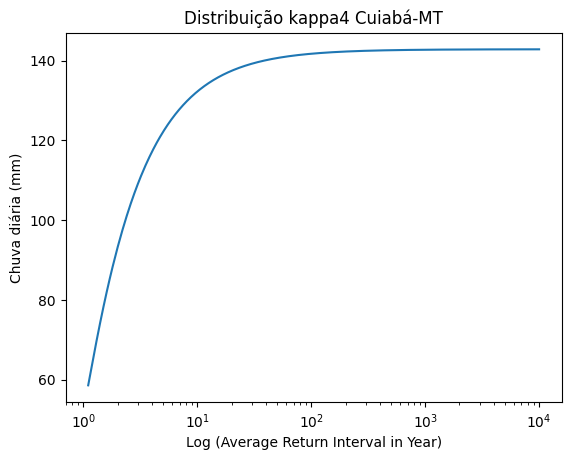

In [244]:
#plt.plot(avi,gevqua)
plt.plot(T,kappa4_quantiles)
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição kappa4 {}".format(nomecidade))
plt.show()

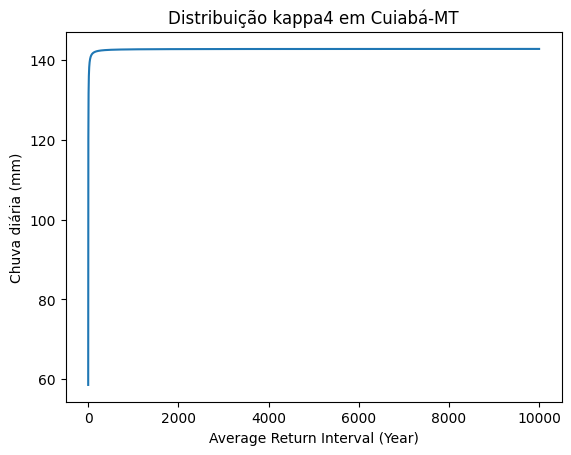

In [245]:
plt.plot(T,kappa4_quantiles)

plt.ylabel('Chuva em mm')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição kappa4 em {}".format(nomecidade))
plt.show()

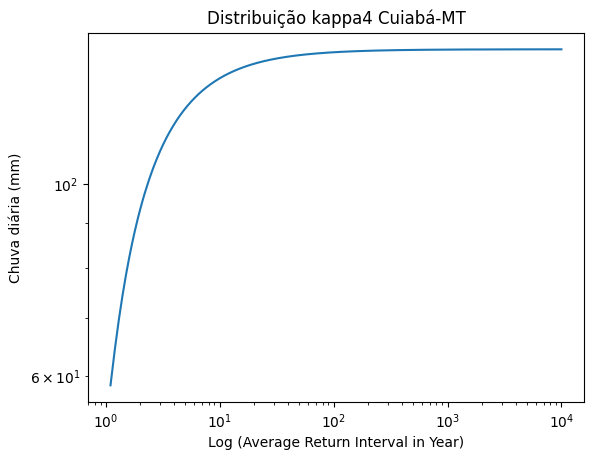

In [246]:
#plt.plot(avi,gevqua)
plt.plot(T,kappa4_quantiles)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuição kappa4 {}".format(nomecidade))
plt.show()

In [247]:
# Salve os dados em um DataFrame do Pandas
datakappa3= {'T': T, 'kappa3_quantiles': glo_quantiles}
datakap3_df = pd.DataFrame(datakappa3)

datakap3_df_1= datakap3_df.sort_values(by='kappa3_quantiles', ascending=False)
datakap3_df_1= datakap3_df_1.reset_index()
display(datakap3_df_1)

# Salve os dados em um DataFrame do Pandas
datakappa4= {'T': T, 'kappa4_quantiles': glo_quantiles}
datakap4_df = pd.DataFrame(datakappa4)

datakap4_df_1= datakap4_df.sort_values(by='kappa4_quantiles', ascending=False)
datakap4_df_1= datakap4_df_1.reset_index()
display(datakap4_df_1)

Ano = int(datakap3_df_1['T'][0])
Valor = datakap3_df_1['kappa3_quantiles'][0]

registro=['KAP3 - KAPPA3 ', Ano, Valor]
Dados_estatisticos.append(registro)

Ano = int(datakap4_df_1['T'][0])
Valor = datakap4_df_1['kappa4_quantiles'][0]

registro=['KAP4 - KAPPA4 ', Ano, Valor]

Dados_estatisticos.append(registro)


,index,T,kappa3_quantiles
0,99989,10000.0,214.495403
1,99988,9999.9,214.495280
2,99987,9999.8,214.495156
3,99986,9999.7,214.495033
4,99985,9999.6,214.494910
...,...,...,...
99985,4,1.5,79.107813
99986,3,1.4,76.378485
99987,2,1.3,73.048058
99988,1,1.2,68.716172


,index,T,kappa4_quantiles
0,99989,10000.0,214.495403
1,99988,9999.9,214.495280
2,99987,9999.8,214.495156
3,99986,9999.7,214.495033
4,99985,9999.6,214.494910
...,...,...,...
99985,4,1.5,79.107813
99986,3,1.4,76.378485
99987,2,1.3,73.048058
99988,1,1.2,68.716172


In [248]:
Dados_estatisticos

[['GEV', 10000, 174.50839731528015],
 ['EXP- Exponencial', 10000, 403.41528595402565],
 ['GUM - Gummbel', 10000, 260.6835046607476],
 ['WEI - Weibull ', 10000, 197.4626465084262],
 ['GPA - Gamma ', 10000, 223.3831087356496],
 ['PE3 - Pareto ', 10000, 142.29965782648878],
 ['GAM - Gamma Generalizada ', 10000, 42747.625072055744],
 ['LN - LOG NORMAL ', 10000, 214.49540306912544],
 ['GLO - Generalized Logistic', 10000, 260.2796391757182],
 ['KAP3 - KAPPA3 ', 10000, 214.49540306912544],
 ['KAP4 - KAPPA4 ', 10000, 214.49540306912544]]

In [249]:
Dados_estatisticos_df=  pd.DataFrame(Dados_estatisticos, columns= ['Tipo', 'T' , 'Maior chuva'])


In [250]:
Dados_estatisticos_df

,Tipo,T,Maior chuva
0,GEV,10000,174.508397
1,EXP- Exponencial,10000,403.415286
2,GUM - Gummbel,10000,260.683505
3,WEI - Weibull,10000,197.462647
4,GPA - Gamma,10000,223.383109
5,PE3 - Pareto,10000,142.299658
6,GAM - Gamma Generalizada,10000,42747.625072
7,LN - LOG NORMAL,10000,214.495403
8,GLO - Generalized Logistic,10000,260.279639
9,KAP3 - KAPPA3,10000,214.495403


In [251]:
Dados_estatisticos_df =Dados_estatisticos_df.round(2)

In [252]:
Dados_estatisticos_df

,Tipo,T,Maior chuva
0,GEV,10000,174.51
1,EXP- Exponencial,10000,403.42
2,GUM - Gummbel,10000,260.68
3,WEI - Weibull,10000,197.46
4,GPA - Gamma,10000,223.38
5,PE3 - Pareto,10000,142.30
6,GAM - Gamma Generalizada,10000,42747.63
7,LN - LOG NORMAL,10000,214.50
8,GLO - Generalized Logistic,10000,260.28
9,KAP3 - KAPPA3,10000,214.50


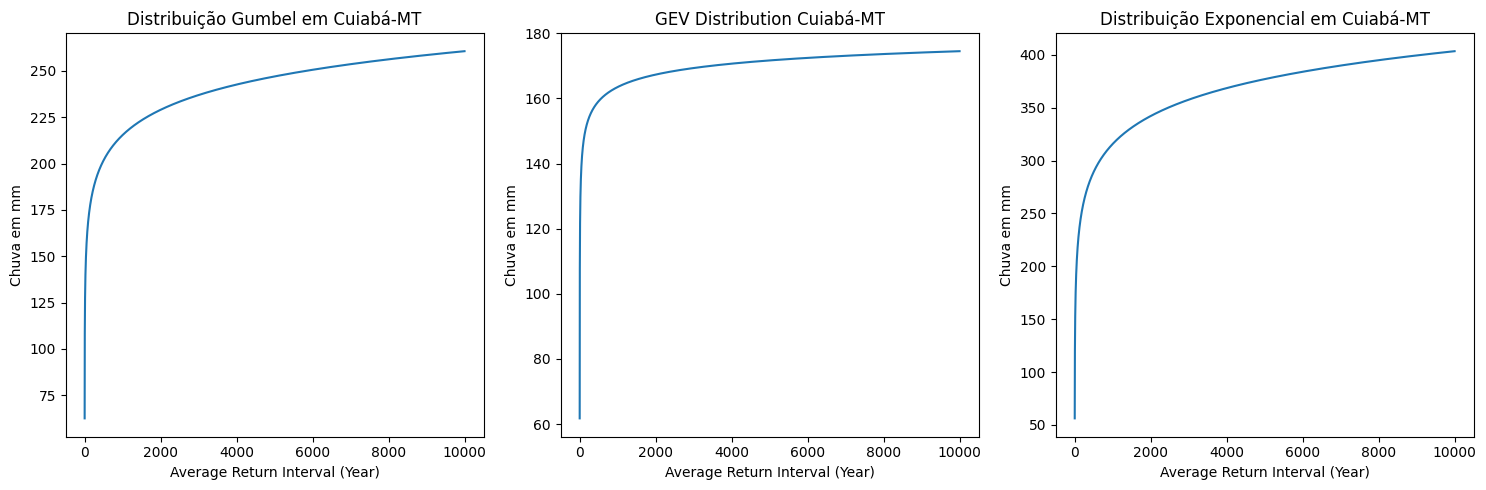

In [253]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the Gumbel distribution in the first subplot
axs[0].plot(T, gum_quantiles)
axs[0].set_ylabel('Chuva em mm')
axs[0].set_xlabel('Average Return Interval (Year)')
axs[0].set_title("Distribuição Gumbel em {}".format(nomecidade))

# Plot the GEV distribution in the second subplot
axs[1].plot(T, gev_quantiles)
axs[1].set_ylabel('Chuva em mm')
axs[1].set_xlabel('Average Return Interval (Year)')
axs[1].set_title("GEV Distribution {}".format(nomecidade))

# Plot the Exponential distribution in the third subplot
axs[2].plot(T, exp_quantiles)
axs[2].set_ylabel('Chuva em mm')
axs[2].set_xlabel('Average Return Interval (Year)')
axs[2].set_title("Distribuição Exponencial em {}".format(nomecidade))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

/home/casamentos/anaconda3/envs/Maq_AmbienteVirtual/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


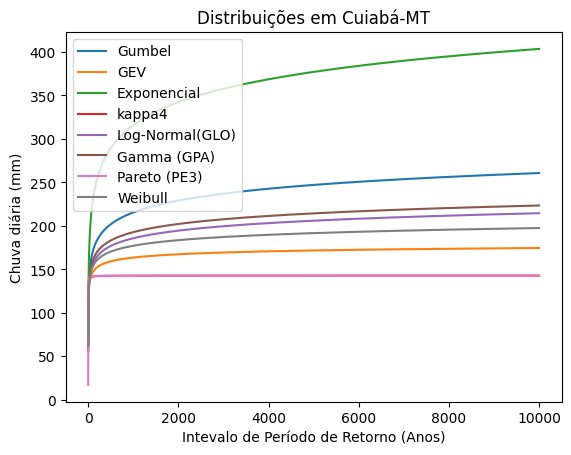

In [254]:
import matplotlib.pyplot as plt



# Plotar Distribuição Gumbel 
plt.plot(T, gum_quantiles, label='Gumbel')

# Plotar Distribuição GEV 
plt.plot(T, gev_quantiles, label='GEV')

# Plotar Distribuição  Exponencial 
plt.plot(T, exp_quantiles, label='Exponencial') 

# Plotar Distribuição kappa3
#plt.plot(T,kappa3_quantiles,label='kappa3' )

# Plotar Distribuição kappa4
plt.plot(T,kappa4_quantiles,label='kappa4' )

# Plotar Distribuição Log-Normal(GLO)
plt.plot(T,glo_quantiles, label='Log-Normal(GLO)')

# Plotar Distribuição Gamma Generalizada(GAM)
#plt.plot(T,gam_quantiles, label='Gamma Generalizada(GAM)')

# Plotar Distribuição Gamma (GPA)
plt.plot(T,gpa_quantiles,label='Gamma (GPA)')

# Plotar Distribuição Pareto (PE3)
plt.plot(T,pe3_quantiles,label='Pareto (PE3)')

# Plotar Distribuição Weibull
plt.plot(T,wei_quantiles, label='Weibull')

# Set labels and title
plt.xlabel('Intevalo de Período de Retorno (Anos)')
plt.ylabel('Chuva diária (mm)')
plt.title("Distribuições em {}".format(nomecidade))

plt.legend()

# Show the plot
plt.show()

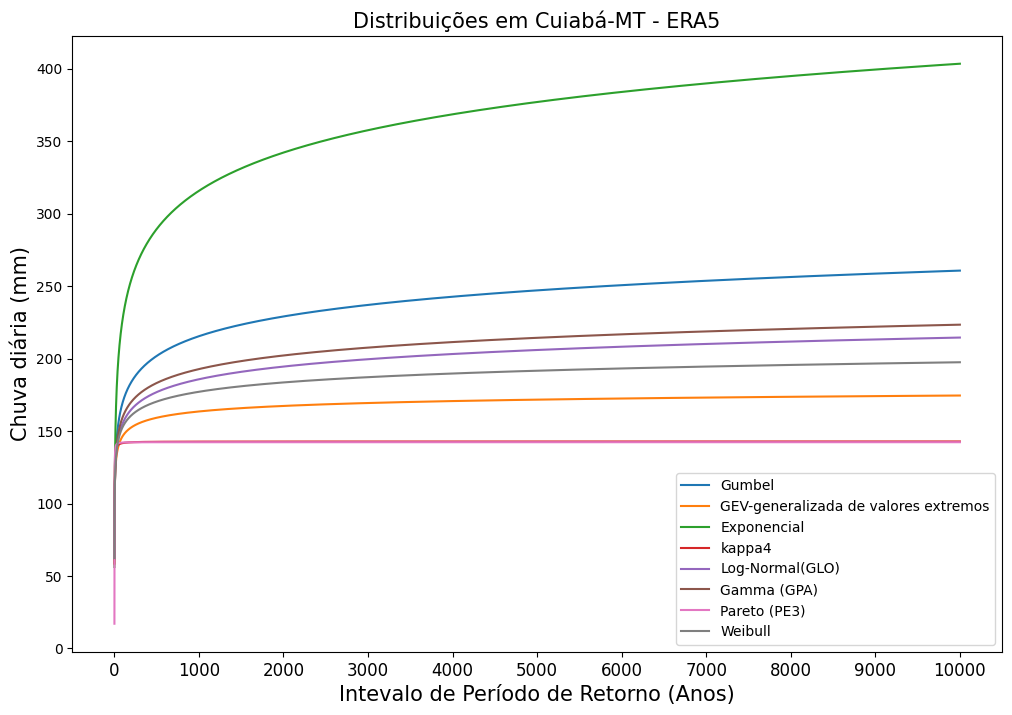

In [255]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plotar Distribuição Gumbel 
plt.plot(T, gum_quantiles, label='Gumbel')

# Plotar Distribuição GEV 
plt.plot(T, gev_quantiles, label='GEV-generalizada de valores extremos')

# Plotar Distribuição  Exponencial 
plt.plot(T, exp_quantiles, label='Exponencial') 

# Plotar Distribuição kappa3
#plt.plot(T,kappa3_quantiles,label='kappa3' )

# Plotar Distribuição kappa4
plt.plot(T,kappa4_quantiles,label='kappa4' )

# Plotar Distribuição Log-Normal(GLO)
plt.plot(T,glo_quantiles, label='Log-Normal(GLO)')

# Plotar Distribuição Gamma Generalizada(GAM)
#plt.plot(T,gam_quantiles, label='Gamma Generalizada(GAM)')

# Plotar Distribuição Gamma (GPA)
plt.plot(T,gpa_quantiles,label='Gamma (GPA)')

# Plotar Distribuição Pareto (PE3)
plt.plot(T,pe3_quantiles,label='Pareto (PE3)')

# Plotar Distribuição Weibull
plt.plot(T,wei_quantiles, label='Weibull')

# Set labels and title
plt.xlabel('Intevalo de Período de Retorno (Anos)',fontsize=15)
plt.ylabel('Chuva diária (mm)',fontsize=15)
plt.title("Distribuições em {} - ERA5".format(nomecidade),fontsize=15)

#plt.legend(loc='upper right')
#plt.legend(loc='upper left')
plt.legend(loc='lower right',fontsize=10)
plt.xticks(fontsize=12)
# Define the range for tick labels on the x-axis
#x_range = range(0, 21)  # Modify the range as needed
# Set the tick locations and increase font size
#plt.xticks(x_range, fontsize=12)
# Define the range for tick labels on the x-axis with increments of 100
x_range = range(0, 10000 + 1, 1000)  # Adjust max_value as needed

# Set the tick locations and increase font size
plt.xticks(x_range, fontsize=12)
#plt.savefig('distribuicao_.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [256]:
Dados_estatisticos_df

,Tipo,T,Maior chuva
0,GEV,10000,174.51
1,EXP- Exponencial,10000,403.42
2,GUM - Gummbel,10000,260.68
3,WEI - Weibull,10000,197.46
4,GPA - Gamma,10000,223.38
5,PE3 - Pareto,10000,142.30
6,GAM - Gamma Generalizada,10000,42747.63
7,LN - LOG NORMAL,10000,214.50
8,GLO - Generalized Logistic,10000,260.28
9,KAP3 - KAPPA3,10000,214.50


In [257]:
Dados_estatisticos_df.sort_values(by= 'Maior chuva', ascending=False)

,Tipo,T,Maior chuva
6,GAM - Gamma Generalizada,10000,42747.63
1,EXP- Exponencial,10000,403.42
2,GUM - Gummbel,10000,260.68
8,GLO - Generalized Logistic,10000,260.28
4,GPA - Gamma,10000,223.38
7,LN - LOG NORMAL,10000,214.50
9,KAP3 - KAPPA3,10000,214.50
10,KAP4 - KAPPA4,10000,214.50
3,WEI - Weibull,10000,197.46
0,GEV,10000,174.51


In [258]:
Dados_estatisticos_df['Maior chuva formal(mm)']= Dados_estatisticos_df['Maior chuva']

In [259]:
# Função para formatar os valores em notação científica
def formatar_notacao_cientifica(valor):
    return '{:,.2f}'.format(float(valor))

# Convertendo a coluna para valores numéricos
Dados_estatisticos_df['Maior chuva formal(mm)'] = pd.to_numeric(Dados_estatisticos_df['Maior chuva formal(mm)'], errors='coerce')

# Aplicando a função à coluna 'Maior chuva formal(mm)'
Dados_estatisticos_df['Maior chuva formal(mm)'] = Dados_estatisticos_df['Maior chuva formal(mm)'].apply(formatar_notacao_cientifica)

# Imprimindo o DataFrame
print(Dados_estatisticos_df)



                          Tipo      T  Maior chuva Maior chuva formal(mm)
0                          GEV  10000       174.51                 174.51
1             EXP- Exponencial  10000       403.42                 403.42
2                GUM - Gummbel  10000       260.68                 260.68
3               WEI - Weibull   10000       197.46                 197.46
4                 GPA - Gamma   10000       223.38                 223.38
5                PE3 - Pareto   10000       142.30                 142.30
6    GAM - Gamma Generalizada   10000     42747.63              42,747.63
7             LN - LOG NORMAL   10000       214.50                 214.50
8   GLO - Generalized Logistic  10000       260.28                 260.28
9               KAP3 - KAPPA3   10000       214.50                 214.50
10              KAP4 - KAPPA4   10000       214.50                 214.50


In [260]:
Dados_estatisticos_df

,Tipo,T,Maior chuva,Maior chuva formal(mm)
0,GEV,10000,174.51,174.51
1,EXP- Exponencial,10000,403.42,403.42
2,GUM - Gummbel,10000,260.68,260.68
3,WEI - Weibull,10000,197.46,197.46
4,GPA - Gamma,10000,223.38,223.38
5,PE3 - Pareto,10000,142.30,142.30
6,GAM - Gamma Generalizada,10000,42747.63,"42,747.63"
7,LN - LOG NORMAL,10000,214.50,214.50
8,GLO - Generalized Logistic,10000,260.28,260.28
9,KAP3 - KAPPA3,10000,214.50,214.50


In [261]:

# Função para formatar os valores em notação científica
def formatar_notacao_cientifica(valor):
    try:
        return '{:,.2f}'.format(float(valor))
    except ValueError:
        return valor

# Convertendo a coluna para valores numéricos
Dados_estatisticos_df['Maior chuva formal(mm)'] = pd.to_numeric(Dados_estatisticos_df['Maior chuva formal(mm)'], errors='coerce')

# Aplicando a função à coluna 'Maior chuva formal(mm)'
Dados_estatisticos_df['Maior chuva formal(mm)'] = Dados_estatisticos_df['Maior chuva formal(mm)'].apply(formatar_notacao_cientifica)


In [262]:
Dados_estatisticos_df

,Tipo,T,Maior chuva,Maior chuva formal(mm)
0,GEV,10000,174.51,174.51
1,EXP- Exponencial,10000,403.42,403.42
2,GUM - Gummbel,10000,260.68,260.68
3,WEI - Weibull,10000,197.46,197.46
4,GPA - Gamma,10000,223.38,223.38
5,PE3 - Pareto,10000,142.30,142.30
6,GAM - Gamma Generalizada,10000,42747.63,nan
7,LN - LOG NORMAL,10000,214.50,214.50
8,GLO - Generalized Logistic,10000,260.28,260.28
9,KAP3 - KAPPA3,10000,214.50,214.50


In [263]:

metodo = []
for i, anoi in enumerate(datagev0_df_1['T']):
    #print(ano)
    ano= round(anoi,1)
    if ano==2.0:
        print(ano)
        QA2 = datagev0_df_1.loc[i,'gev_quantiles']
        ano0=int(ano)
        print(QA2)
    elif ano==5.0:
        print(ano)
        QA5 = datagev0_df_1.loc[i,'gev_quantiles']
        ano0=int(ano)
        print(QA5)
    elif ano==10.0:
        print(ano)
        QA10 = datagev0_df_1.loc[i,'gev_quantiles']
        ano0=int(ano)
        print(QA10)
    elif ano==25.0:
        print(ano)
        QA25 = datagev0_df_1.loc[i,'gev_quantiles']
        ano0=int(ano)
        print(QA25) 
    elif ano==50.0:
        print(ano)
        QA50 = datagev0_df_1.loc[i,'gev_quantiles']
        ano0=int(ano)
        print(QA50)        
    elif ano==100.0:
        print(ano)
        QA100 = datagev0_df_1.loc[i,'gev_quantiles']
        ano0=int(ano)
        print(QA100) 
    elif ano==500.0:
        print(ano)
        QA500 = datagev0_df_1.loc[i,'gev_quantiles']
        ano0=int(ano)
        print(QA500)           
    elif ano==1000.0:
        print(ano)
        QA1000 = datagev0_df_1.loc[i,'gev_quantiles']
        ano0=int(ano)
        print(QA1000)   
    elif ano==10000.0:
        print(ano)
        QAano10000 = datagev0_df_1.loc[i,'gev_quantiles']
        ano0=int(ano)
        print(QAano10000)            
    elif ano==10000.0:
        print(ano)
        QAano10000 = datagev0_df_1.loc[i,'glo_of_quantiles ']
        ano0=int(ano)
        print(QAano10000)            
        
        
        
        
registros=['GEV', QA2,QA5,QA10,QA25,QA50,QA100,QA500,QA1000,QAano10000]
        
metodo.append(registros)
        
print()

for i, anoi in enumerate(dataexpo_df_1['T']):
    #print(ano)
    ano= round(anoi,1)
    if ano==2.0:
        print(ano)
        QA2 = dataexpo_df_1.loc[i,'exp_quantiles']
        ano0=int(ano)
        print(QA2)
    elif ano==5.0:
        print(ano)
        QA5 = dataexpo_df_1.loc[i,'exp_quantiles']
        ano0=int(ano)
        print(QA5)
    elif ano==10.0:
        print(ano)
        QA10 = dataexpo_df_1.loc[i,'exp_quantiles']
        ano0=int(ano)
        print(QA10)
    elif ano==25.0:
        print(ano)
        QA25 = dataexpo_df_1.loc[i,'exp_quantiles']
        ano0=int(ano)
        print(QA25) 
    elif ano==50.0:
        print(ano)
        QA50 = dataexpo_df_1.loc[i,'exp_quantiles']
        ano0=int(ano)
        print(QA50)        
    elif ano==100.0:
        print(ano)
        QA100 = dataexpo_df_1.loc[i,'exp_quantiles']
        ano0=int(ano)
        print(QA100) 
    elif ano==500.0:
        print(ano)
        QA500 = dataexpo_df_1.loc[i,'exp_quantiles']
        ano0=int(ano)
        print(QA500)           
    elif ano==1000.0:
        print(ano)
        QA1000 = dataexpo_df_1.loc[i,'exp_quantiles']
        ano0=int(ano)
        print(QA1000)   
    elif ano==10000.0:
        print(ano)
        QAano10000 = dataexpo_df_1.loc[i,'exp_quantiles']
        ano0=int(ano)
        print(QAano10000)            
        
print()
registros=['Exponencial', QA2,QA5,QA10,QA25,QA50,QA100,QA500,QA1000,QAano10000]
metodo.append(registros)
                

for i, anoi in enumerate(datagumbel_df_1['T']):
    #print(ano)
    ano= round(anoi,1)
    if ano==2.0:
        print(ano)
        QA2 = datagumbel_df_1.loc[i,'gum_quantiles']
        ano0=int(ano)
        print(QA2)
    elif ano==5.0:
        print(ano)
        QA5 = datagumbel_df_1.loc[i,'gum_quantiles']
        ano0=int(ano)
        print(QA5)
    elif ano==10.0:
        print(ano)
        QA10 = datagumbel_df_1.loc[i,'gum_quantiles']
        ano0=int(ano)
        print(QA10)
    elif ano==25.0:
        print(ano)
        QA25 = datagumbel_df_1.loc[i,'gum_quantiles']
        ano0=int(ano)
        print(QA25) 
    elif ano==50.0:
        print(ano)
        QA50 = datagumbel_df_1.loc[i,'gum_quantiles']
        ano0=int(ano)
        print(QA50)        
    elif ano==100.0:
        print(ano)
        QA100 = datagumbel_df_1.loc[i,'gum_quantiles']
        ano0=int(ano)
        print(QA100) 
    elif ano==500.0:
        print(ano)
        QA500 = datagumbel_df_1.loc[i,'gum_quantiles']
        ano0=int(ano)
        print(QA500)           
    elif ano==1000.0:
        print(ano)
        QA1000 = datagumbel_df_1.loc[i,'gum_quantiles']
        ano0=int(ano)
        print(QA1000)   
    elif ano==10000.0:
        print(ano)
        QAano10000 = datagumbel_df_1.loc[i,'gum_quantiles']
        ano0=int(ano)
        print(QAano10000)            
        
print()
registros=['Gumbel', QA2,QA5,QA10,QA25,QA50,QA100,QA500,QA1000,QAano10000]
        
metodo.append(registros)   



for i, anoi in enumerate(dataWeibulll_df_1['T']):
    #print(ano)
    ano= round(anoi,1)
    if ano==2.0:
        print(ano)
        QA2 = dataWeibulll_df_1.loc[i,'wei_quantiles']
        ano0=int(ano)
        print(QA2)
    elif ano==5.0:
        print(ano)
        QA5 = dataWeibulll_df_1.loc[i,'wei_quantiles']
        ano0=int(ano)
        print(QA5)
    elif ano==10.0:
        print(ano)
        QA10 = dataWeibulll_df_1.loc[i,'wei_quantiles']
        ano0=int(ano)
        print(QA10)
    elif ano==25.0:
        print(ano)
        QA25 = dataWeibulll_df_1.loc[i,'wei_quantiles']
        ano0=int(ano)
        print(QA25) 
    elif ano==50.0:
        print(ano)
        QA50 = dataWeibulll_df_1.loc[i,'wei_quantiles']
        ano0=int(ano)
        print(QA50)        
    elif ano==100.0:
        print(ano)
        QA100 = dataWeibulll_df_1.loc[i,'wei_quantiles']
        ano0=int(ano)
        print(QA100) 
    elif ano==500.0:
        print(ano)
        QA500 = dataWeibulll_df_1.loc[i,'wei_quantiles']
        ano0=int(ano)
        print(QA500)           
    elif ano==1000.0:
        print(ano)
        QA1000 = dataWeibulll_df_1.loc[i,'wei_quantiles']
        ano0=int(ano)
        print(QA1000)   
    elif ano==10000.0:
        print(ano)
        QAano10000 = dataWeibulll_df_1.loc[i,'wei_quantiles']
        ano0=int(ano)
        print(QAano10000)            
        
print()
registros=['Weibull', QA2,QA5,QA10,QA25,QA50,QA100,QA500,QA1000,QAano10000]
        
metodo.append(registros) 




for i, anoi in enumerate(dataGamma_df_1['T']):
    #print(ano)
    ano= round(anoi,1)
    if ano==2.0:
        print(ano)
        QA2 = dataGamma_df_1.loc[i,'gpa_quantiles']
        ano0=int(ano)
        print(QA2)
    elif ano==5.0:
        print(ano)
        QA5 = dataGamma_df_1.loc[i,'gpa_quantiles']
        ano0=int(ano)
        print(QA5)
    elif ano==10.0:
        print(ano)
        QA10 = dataGamma_df_1.loc[i,'gpa_quantiles']
        ano0=int(ano)
        print(QA10)
    elif ano==25.0:
        print(ano)
        QA25 = dataGamma_df_1.loc[i,'gpa_quantiles']
        ano0=int(ano)
        print(QA25) 
    elif ano==50.0:
        print(ano)
        QA50 = dataGamma_df_1.loc[i,'gpa_quantiles']
        ano0=int(ano)
        print(QA50)        
    elif ano==100.0:
        print(ano)
        QA100 = dataGamma_df_1.loc[i,'gpa_quantiles']
        ano0=int(ano)
        print(QA100) 
    elif ano==500.0:
        print(ano)
        QA500 = dataGamma_df_1.loc[i,'gpa_quantiles']
        ano0=int(ano)
        print(QA500)           
    elif ano==1000.0:
        print(ano)
        QA1000 = dataGamma_df_1.loc[i,'gpa_quantiles']
        ano0=int(ano)
        print(QA1000)   
    elif ano==10000.0:
        print(ano)
        QAano10000 = dataGamma_df_1.loc[i,'gpa_quantiles']
        ano0=int(ano)
        print(QAano10000)            
        
print()
registros=['Gamma', QA2,QA5,QA10,QA25,QA50,QA100,QA500,QA1000,QAano10000]
        
metodo.append(registros)  




for i, anoi in enumerate(dataPareto_df_1['T']):
    #print(ano)
    ano= round(anoi,1)
    if ano==2.0:
        print(ano)
        QA2 = dataPareto_df_1.loc[i,'pe3_quantiles']
        ano0=int(ano)
        print(QA2)
    elif ano==5.0:
        print(ano)
        QA5 = dataPareto_df_1.loc[i,'pe3_quantiles']
        ano0=int(ano)
        print(QA5)
    elif ano==10.0:
        print(ano)
        QA10 = dataPareto_df_1.loc[i,'pe3_quantiles']
        ano0=int(ano)
        print(QA10)
    elif ano==25.0:
        print(ano)
        QA25 = dataPareto_df_1.loc[i,'pe3_quantiles']
        ano0=int(ano)
        print(QA25) 
    elif ano==50.0:
        print(ano)
        QA50 = dataPareto_df_1.loc[i,'pe3_quantiles']
        ano0=int(ano)
        print(QA50)        
    elif ano==100.0:
        print(ano)
        QA100 = dataPareto_df_1.loc[i,'pe3_quantiles']
        ano0=int(ano)
        print(QA100) 
    elif ano==500.0:
        print(ano)
        QA500 = dataPareto_df_1.loc[i,'pe3_quantiles']
        ano0=int(ano)
        print(QA500)           
    elif ano==1000.0:
        print(ano)
        QA1000 = dataPareto_df_1.loc[i,'pe3_quantiles']
        ano0=int(ano)
        print(QA1000)   
    elif ano==10000.0:
        print(ano)
        QAano10000 = dataPareto_df_1.loc[i,'pe3_quantiles']
        ano0=int(ano)
        print(QAano10000)            
        
print()
registros=['Pareto(PE3)', QA2,QA5,QA10,QA25,QA50,QA100,QA500,QA1000,QAano10000]
        
metodo.append(registros)  



for i, anoi in enumerate(dataGLO_df_1['T']):
    #print(ano)
    ano= round(anoi,1)
    if ano==2.0:
        print(ano)
        QA2 = dataGLO_df_1.loc[i,'glo_quantiles']
        ano0=int(ano)
        print(QA2)
    elif ano==5.0:
        print(ano)
        QA5 = dataGLO_df_1.loc[i,'glo_quantiles']
        ano0=int(ano)
        print(QA5)
    elif ano==10.0:
        print(ano)
        QA10 = dataGLO_df_1.loc[i,'glo_quantiles']
        ano0=int(ano)
        print(QA10)
    elif ano==25.0:
        print(ano)
        QA25 = dataGLO_df_1.loc[i,'glo_quantiles']
        ano0=int(ano)
        print(QA25) 
    elif ano==50.0:
        print(ano)
        QA50 = dataGLO_df_1.loc[i,'glo_quantiles']
        ano0=int(ano)
        print(QA50)        
    elif ano==100.0:
        print(ano)
        QA100 = dataGLO_df_1.loc[i,'glo_quantiles']
        ano0=int(ano)
        print(QA100) 
    elif ano==500.0:
        print(ano)
        QA500 = dataGLO_df_1.loc[i,'glo_quantiles']
        ano0=int(ano)
        print(QA500)           
    elif ano==1000.0:
        print(ano)
        QA1000 = dataGLO_df_1.loc[i,'glo_quantiles']
        ano0=int(ano)
        print(QA1000)   
    elif ano==10000.0:
        print(ano)
        QAano10000 = dataGLO_df_1.loc[i,'glo_quantiles']
        ano0=int(ano)
        print(QAano10000)            
        
print()
registros=['Log-Normal(LN)', QA2,QA5,QA10,QA25,QA50,QA100,QA500,QA1000,QAano10000]
        
metodo.append(registros)  




for i, anoi in enumerate(datakap3_df_1['T']):
    #print(ano)
    ano= round(anoi,1)
    if ano==2.0:
        print(ano)
        QA2 = datakap3_df_1.loc[i,'kappa3_quantiles']
        ano0=int(ano)
        print(QA2)
    elif ano==5.0:
        print(ano)
        QA5 = datakap3_df_1.loc[i,'kappa3_quantiles']
        ano0=int(ano)
        print(QA5)
    elif ano==10.0:
        print(ano)
        QA10 = datakap3_df_1.loc[i,'kappa3_quantiles']
        ano0=int(ano)
        print(QA10)
    elif ano==25.0:
        print(ano)
        QA25 = datakap3_df_1.loc[i,'kappa3_quantiles']
        ano0=int(ano)
        print(QA25) 
    elif ano==50.0:
        print(ano)
        QA50 = datakap3_df_1.loc[i,'kappa3_quantiles']
        ano0=int(ano)
        print(QA50)        
    elif ano==100.0:
        print(ano)
        QA100 = datakap3_df_1.loc[i,'kappa3_quantiles']
        ano0=int(ano)
        print(QA100) 
    elif ano==500.0:
        print(ano)
        QA500 = datakap3_df_1.loc[i,'kappa3_quantiles']
        ano0=int(ano)
        print(QA500)           
    elif ano==1000.0:
        print(ano)
        QA1000 = datakap3_df_1.loc[i,'kappa3_quantiles']
        ano0=int(ano)
        print(QA1000)   
    elif ano==10000.0:
        print(ano)
        QAano10000 = datakap3_df_1.loc[i,'kappa3_quantiles']
        ano0=int(ano)
        print(QAano10000)            
        
print()
registros=['Kappa3', QA2,QA5,QA10,QA25,QA50,QA100,QA500,QA1000,QAano10000]
        
metodo.append(registros)  


for i, anoi in enumerate(datakap4_df_1['T']):
    #print(ano)
    ano= round(anoi,1)
    if ano==2.0:
        print(ano)
        QA2 = datakap4_df_1.loc[i,'kappa4_quantiles']
        ano0=int(ano)
        print(QA2)
    elif ano==5.0:
        print(ano)
        QA5 = datakap4_df_1.loc[i,'kappa4_quantiles']
        ano0=int(ano)
        print(QA5)
    elif ano==10.0:
        print(ano)
        QA10 = datakap4_df_1.loc[i,'kappa4_quantiles']
        ano0=int(ano)
        print(QA10)
    elif ano==25.0:
        print(ano)
        QA25 = datakap4_df_1.loc[i,'kappa4_quantiles']
        ano0=int(ano)
        print(QA25) 
    elif ano==50.0:
        print(ano)
        QA50 = datakap4_df_1.loc[i,'kappa4_quantiles']
        ano0=int(ano)
        print(QA50)        
    elif ano==100.0:
        print(ano)
        QA100 = datakap4_df_1.loc[i,'kappa4_quantiles']
        ano0=int(ano)
        print(QA100) 
    elif ano==500.0:
        print(ano)
        QA500 = datakap4_df_1.loc[i,'kappa4_quantiles']
        ano0=int(ano)
        print(QA500)           
    elif ano==1000.0:
        print(ano)
        QA1000 = datakap4_df_1.loc[i,'kappa4_quantiles']
        ano0=int(ano)
        print(QA1000)   
    elif ano==10000.0:
        print(ano)
        QAano10000 = datakap4_df_1.loc[i,'kappa4_quantiles']
        ano0=int(ano)
        print(QAano10000)            
        
print()
registros=['kappa4', QA2,QA5,QA10,QA25,QA50,QA100,QA500,QA1000,QAano10000]
        
metodo.append(registros)  



for i, anoi in enumerate(dataglo_of_df_1['T']):
    #print(ano)
    ano= round(anoi,1)
    if ano==2.0:
        print(ano)
        QA2 = dataglo_of_df_1.loc[i,'glo_of_quantiles']
        ano0=int(ano)
        print(QA2)
    elif ano==5.0:
        print(ano)
        QA5 = dataglo_of_df_1.loc[i,'glo_of_quantiles']
        ano0=int(ano)
        print(QA5)
    elif ano==10.0:
        print(ano)
        QA10 = dataglo_of_df_1.loc[i,'glo_of_quantiles']
        ano0=int(ano)
        print(QA10)
    elif ano==25.0:
        print(ano)
        QA25 = dataglo_of_df_1.loc[i,'glo_of_quantiles']
        ano0=int(ano)
        print(QA25) 
    elif ano==50.0:
        print(ano)
        QA50 = dataglo_of_df_1.loc[i,'glo_of_quantiles']
        ano0=int(ano)
        print(QA50)        
    elif ano==100.0:
        print(ano)
        QA100 = dataglo_of_df_1.loc[i,'glo_of_quantiles']
        ano0=int(ano)
        print(QA100) 
    elif ano==500.0:
        print(ano)
        QA500 = dataglo_of_df_1.loc[i,'glo_of_quantiles']
        ano0=int(ano)
        print(QA500)           
    elif ano==1000.0:
        print(ano)
        QA1000 = dataglo_of_df_1.loc[i,'glo_of_quantiles']
        ano0=int(ano)
        print(QA1000)   
    elif ano==10000.0:
        print(ano)
        QAano10000 = dataglo_of_df_1.loc[i,'glo_of_quantiles']
        ano0=int(ano)
        print(QAano10000)            
        
print()
registros=['Generalized Logistic(GLO)', QA2,QA5,QA10,QA25,QA50,QA100,QA500,QA1000,QAano10000]
        
metodo.append(registros)  



10000.0
174.50839731528015
1000.0
163.50649491409246
500.0
159.16796532988332
100.0
146.64659529588408
50.0
139.96087285696393
25.0
132.29612571874705
10.0
120.25791778891372
5.0
109.12016218774328
2.0
89.08635172158013

10000.0
403.41528595402565
1000.0
315.71146446551603
500.0
289.3099834631167
100.0
228.00764297701068
50.0
201.6061619746113
25.0
175.20468097221197
10.0
140.30382148850535
5.0
113.90234048610601
2.0
79.00148100239934

10000.0
260.6835046607476
1000.0
215.4180093441281
500.0
201.78456154494555
100.0
170.07250865046132
50.0
156.34938107072662
25.0
142.52417030485168
10.0
123.88822237642648
5.0
109.13878919206888
2.0
86.86160674078056

10000.0
197.4626465084262
1000.0
177.09388620535645
500.0
170.32444810534108
100.0
153.00032921335065
50.0
144.62343575470504
25.0
135.47850260303875
10.0
121.73803897081335
5.0
109.41811364088315
2.0
87.92494495125382

10000.0
223.3831087356496
1000.0
192.73559898625706
500.0
183.1368944496744
100.0
159.8703659372386
50.0
149.272877291822

In [264]:
metodo

[['GEV',
  89.08635172158013,
  109.12016218774328,
  120.25791778891372,
  132.29612571874705,
  139.96087285696393,
  146.64659529588408,
  159.16796532988332,
  163.50649491409246,
  174.50839731528015],
 ['Exponencial',
  79.00148100239934,
  113.90234048610601,
  140.30382148850535,
  175.20468097221197,
  201.6061619746113,
  228.00764297701068,
  289.3099834631167,
  315.71146446551603,
  403.41528595402565],
 ['Gumbel',
  86.86160674078056,
  109.13878919206888,
  123.88822237642648,
  142.52417030485168,
  156.34938107072662,
  170.07250865046132,
  201.78456154494555,
  215.4180093441281,
  260.6835046607476],
 ['Weibull',
  87.92494495125382,
  109.41811364088315,
  121.73803897081335,
  135.47850260303875,
  144.62343575470504,
  153.00032921335065,
  170.32444810534108,
  177.09388620535645,
  197.4626465084262],
 ['Gamma',
  87.39452034640226,
  109.05291092067931,
  122.37684962904903,
  138.17296147060426,
  149.2728772918226,
  159.8703659372386,
  183.1368944496744,
 

In [265]:
metodo_df=  pd.DataFrame(metodo, columns= ['Metodo estatístico',2, 5,10, 25, 50, 100, 500, 1000, 10000 ])


In [266]:
metodo_df

,Metodo estatístico,2,5,10,25,50,100,500,1000,10000
0,GEV,89.086352,109.120162,120.257918,132.296126,139.960873,146.646595,159.167965,163.506495,174.508397
1,Exponencial,79.001481,113.902340,140.303821,175.204681,201.606162,228.007643,289.309983,315.711464,403.415286
2,Gumbel,86.861607,109.138789,123.888222,142.524170,156.349381,170.072509,201.784562,215.418009,260.683505
3,Weibull,87.924945,109.418114,121.738039,135.478503,144.623436,153.000329,170.324448,177.093886,197.462647
4,Gamma,87.394520,109.052911,122.376850,138.172961,149.272877,159.870366,183.136894,192.735599,223.383109
5,Pareto(PE3),88.248272,127.387811,136.670480,140.746887,141.713682,142.078658,142.276947,142.291297,142.299658
6,Log-Normal(LN),88.335563,108.956919,121.273388,135.720573,145.837571,155.503016,176.842501,185.722693,214.495403
7,Kappa3,88.335563,108.956919,121.273388,135.720573,145.837571,155.503016,176.842501,185.722693,214.495403
8,kappa4,88.335563,108.956919,121.273388,135.720573,145.837571,155.503016,176.842501,185.722693,214.495403
9,Generalized Logistic(GLO),86.867054,109.107206,123.824294,142.415962,156.207221,169.896230,201.528817,215.128002,260.279639


In [267]:
#metodo_df.to_excel('completo.xlsx')

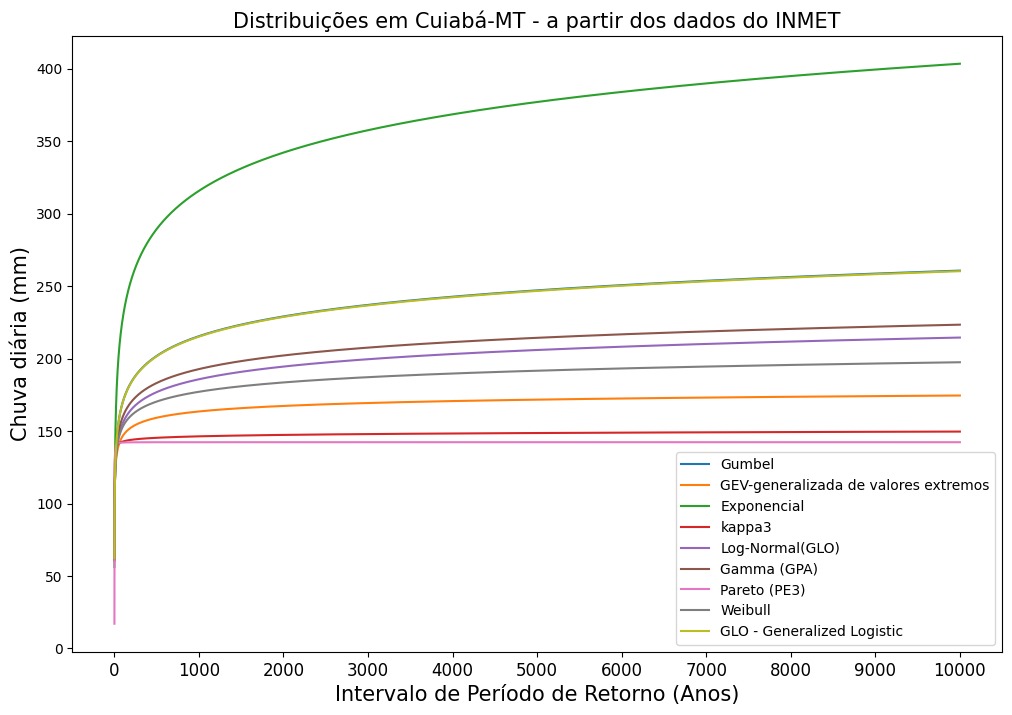

In [278]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plotar Distribuição Gumbel 
plt.plot(T, gum_quantiles, label='Gumbel')

# Plotar Distribuição GEV 
plt.plot(T, gev_quantiles, label='GEV-generalizada de valores extremos')

# Plotar Distribuição  Exponencial 
plt.plot(T, exp_quantiles, label='Exponencial') 

# Plotar Distribuição kappa3
plt.plot(T,kappa3_quantiles,label='kappa3' )
#plt.plot(T,kappa3_quantiles,label='Kappa' )
# Plotar Distribuição kappa4
#plt.plot(T,kappa4_quantiles,label='kappa4' )

# Plotar Distribuição Log-Normal(GLO)
plt.plot(T,glo_quantiles, label='Log-Normal(GLO)')

# Plotar Distribuição Gamma Generalizada(GAM)
#plt.plot(T,gam_quantiles, label='Gamma Generalizada(GAM)')

# Plotar Distribuição Gamma (GPA)
plt.plot(T,gpa_quantiles,label='Gamma (GPA)')

# Plotar Distribuição Pareto (PE3)
plt.plot(T,pe3_quantiles,label='Pareto (PE3)')

# Plotar Distribuição Weibull
plt.plot(T,wei_quantiles, label='Weibull')


# Plotar Distribuição GLO - Generalized Logistic
plt.plot(T,glo_of_quantiles, label='GLO - Generalized Logistic')

# Set labels and title
plt.xlabel('Intervalo de Período de Retorno (Anos)',fontsize=15)
plt.ylabel('Chuva diária (mm)',fontsize=15)
plt.title("Distribuições em {} - a partir dos dados do INMET".format(nomecidade),fontsize=15)

#plt.legend(loc='upper right')
#plt.legend(loc='upper left')
plt.legend(loc='lower right',fontsize=10)
plt.xticks(fontsize=12)
# Define the range for tick labels on the x-axis
#x_range = range(0, 21)  # Modify the range as needed
# Set the tick locations and increase font size
#plt.xticks(x_range, fontsize=12)
# Define the range for tick labels on the x-axis with increments of 100
x_range = range(0, 10000 + 1, 1000)  # Adjust max_value as needed

# Set the tick locations and increase font size
plt.xticks(x_range, fontsize=12)
plt.savefig('distribuicao_PontodeRetorno.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


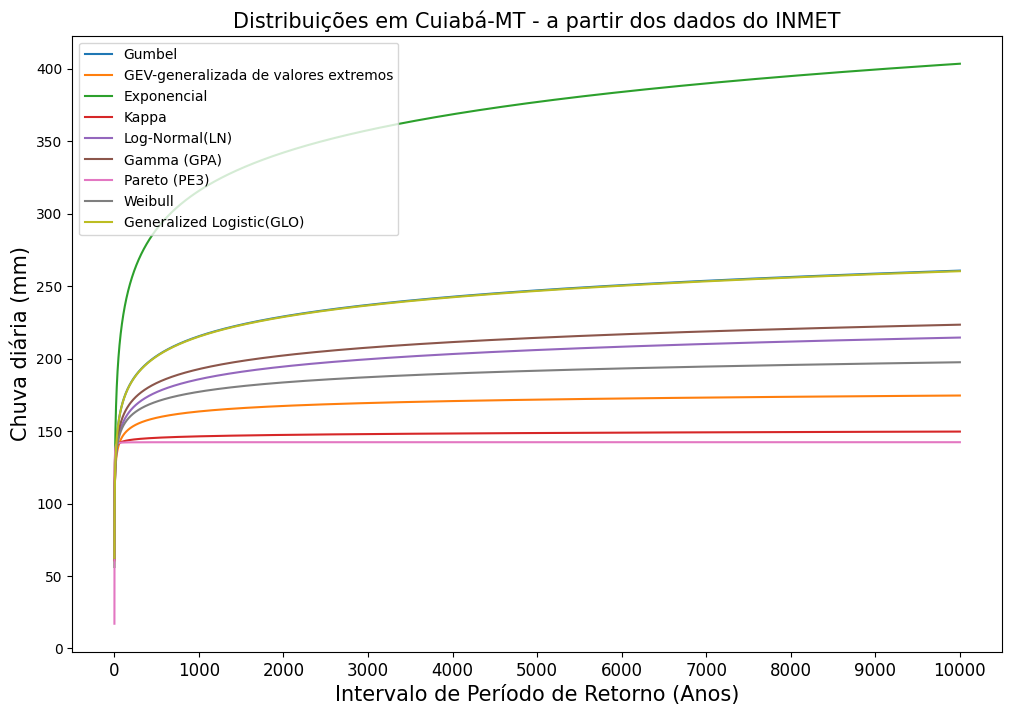

In [279]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plotar Distribuição Gumbel 
plt.plot(T, gum_quantiles, label='Gumbel')

# Plotar Distribuição GEV 
plt.plot(T, gev_quantiles, label='GEV-generalizada de valores extremos')

# Plotar Distribuição  Exponencial 
plt.plot(T, exp_quantiles, label='Exponencial') 

# Plotar Distribuição kappa3
#plt.plot(T,kappa3_quantiles,label='kappa3' )
plt.plot(T,kappa3_quantiles,label='Kappa' )
# Plotar Distribuição kappa4
#plt.plot(T,kappa4_quantiles,label='kappa4' )

# Plotar Distribuição Log-Normal(GLO)
plt.plot(T,glo_quantiles, label='Log-Normal(LN)')

# Plotar Distribuição Gamma Generalizada(GAM)
#plt.plot(T,gam_quantiles, label='Gamma Generalizada(GAM)')

# Plotar Distribuição Gamma (GPA)
plt.plot(T,gpa_quantiles,label='Gamma (GPA)')

# Plotar Distribuição Pareto (PE3)
plt.plot(T,pe3_quantiles,label='Pareto (PE3)')

# Plotar Distribuição Weibull
plt.plot(T,wei_quantiles, label='Weibull')

# Plotar Distribuição GLO - Generalized Logistic
plt.plot(T,glo_of_quantiles, label='Generalized Logistic(GLO)')

# Set labels and title
plt.xlabel('Intervalo de Período de Retorno (Anos)',fontsize=15)
plt.ylabel('Chuva diária (mm)',fontsize=15)
plt.title("Distribuições em {} - a partir dos dados do INMET".format(nomecidade),fontsize=15)

#plt.legend(loc='upper right')
#plt.legend(loc='upper left')

plt.legend(loc='upper left',fontsize=10)

#plt.legend(loc='lower right',fontsize=10)
plt.xticks(fontsize=12)
# Define the range for tick labels on the x-axis
#x_range = range(0, 21)  # Modify the range as needed
# Set the tick locations and increase font size
#plt.xticks(x_range, fontsize=12)
# Define the range for tick labels on the x-axis with increments of 100
x_range = range(0, 10000 + 1, 1000)  # Adjust max_value as needed

# Set the tick locations and increase font size
plt.xticks(x_range, fontsize=12)
plt.savefig('distribuicao_PontodeRetornoCuiaba.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [270]:
metodo_df_imprimir = metodo_df.round(0)

In [271]:
colunas= list(metodo_df_imprimir.columns)

In [272]:
colunas

['Metodo estatístico', 2, 5, 10, 25, 50, 100, 500, 1000, 10000]

In [273]:
for coluna in colunas:
    # Convert the column to string type if it's not already
    metodo_df_imprimir[coluna] = metodo_df_imprimir[coluna].astype(str)
    
    # Use .str.replace on the column
    metodo_df_imprimir[coluna] = metodo_df_imprimir[coluna].str.replace('.', ',')

In [274]:
metodo_df_imprimir

,Metodo estatístico,2,5,10,25,50,100,500,1000,10000
0,GEV,"89,0","109,0","120,0","132,0","140,0","147,0","159,0","164,0","175,0"
1,Exponencial,"79,0","114,0","140,0","175,0","202,0","228,0","289,0","316,0","403,0"
2,Gumbel,"87,0","109,0","124,0","143,0","156,0","170,0","202,0","215,0","261,0"
3,Weibull,"88,0","109,0","122,0","135,0","145,0","153,0","170,0","177,0","197,0"
4,Gamma,"87,0","109,0","122,0","138,0","149,0","160,0","183,0","193,0","223,0"
5,Pareto(PE3),"88,0","127,0","137,0","141,0","142,0","142,0","142,0","142,0","142,0"
6,Log-Normal(LN),"88,0","109,0","121,0","136,0","146,0","156,0","177,0","186,0","214,0"
7,Kappa3,"88,0","109,0","121,0","136,0","146,0","156,0","177,0","186,0","214,0"
8,kappa4,"88,0","109,0","121,0","136,0","146,0","156,0","177,0","186,0","214,0"
9,Generalized Logistic(GLO),"87,0","109,0","124,0","142,0","156,0","170,0","202,0","215,0","260,0"


In [275]:
metodo_df_imprimir.to_excel('metodos_IDF_Periodo_retornoCuiaba.xlsx')

In [276]:
import numpy as np
from scipy.stats import kstest, norm



kap_params4 = stats.kappa4.fit(Max_anual_novo)
print("Parâmetros da distribuição Kappa4:", kap_params4)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kappa4.html
print('x, h, k')

print(f"Parâmetros ajustados da distribuição Kappa-4: xi={kap_params4[0]}, alpha={kap_params4[1]}, k={kap_params4[2]}, h={kap_params4[3]}")



# Calcula a medida de aderência Z usando o teste de Kolmogorov-Smirnov
#_, p_value = kstest(Max_anual_novo, cdf='norm', args=kap_params4)

# Exibe o resultado
#print(f"Medida de Aderência Z usando o teste de Kolmogorov-Smirnov: {p_value}")

Parâmetros da distribuição Kappa4: (1.1254999772603536, 0.9781831714294315, 41.53782185740883, 99.08166753694555)
x, h, k
Parâmetros ajustados da distribuição Kappa-4: xi=1.1254999772603536, alpha=0.9781831714294315, k=41.53782185740883, h=99.08166753694555


In [277]:
metodo_df_imprimir

,Metodo estatístico,2,5,10,25,50,100,500,1000,10000
0,GEV,"89,0","109,0","120,0","132,0","140,0","147,0","159,0","164,0","175,0"
1,Exponencial,"79,0","114,0","140,0","175,0","202,0","228,0","289,0","316,0","403,0"
2,Gumbel,"87,0","109,0","124,0","143,0","156,0","170,0","202,0","215,0","261,0"
3,Weibull,"88,0","109,0","122,0","135,0","145,0","153,0","170,0","177,0","197,0"
4,Gamma,"87,0","109,0","122,0","138,0","149,0","160,0","183,0","193,0","223,0"
5,Pareto(PE3),"88,0","127,0","137,0","141,0","142,0","142,0","142,0","142,0","142,0"
6,Log-Normal(LN),"88,0","109,0","121,0","136,0","146,0","156,0","177,0","186,0","214,0"
7,Kappa3,"88,0","109,0","121,0","136,0","146,0","156,0","177,0","186,0","214,0"
8,kappa4,"88,0","109,0","121,0","136,0","146,0","156,0","177,0","186,0","214,0"
9,Generalized Logistic(GLO),"87,0","109,0","124,0","142,0","156,0","170,0","202,0","215,0","260,0"
